In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
import catboost as cb
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = pd.read_csv("covid_impact_on_airport_traffic.csv")

In [3]:
dataset

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
7242,Daily,2020-06-05,1.0,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7243,Daily,2020-10-03,1.0,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7244,Daily,2020-07-16,1.0,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7245,Daily,2020-07-31,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [5]:
dataset.describe(include = "all")

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
count,7247,7247,7247.0,7247,7247.000000,7247,7247,7247,7247,7247,7247
unique,1,262,NaN,28,NaN,28,27,23,23,4,28
top,Daily,2020-04-03,NaN,Hartsfield-Jackson Atlanta International,NaN,POINT(-84.4279188822754 33.6410758198944),New York,New York,US-NY,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
freq,7247,28,NaN,262,NaN,262,523,523,523,4441,262
mean,NaN,NaN,1.0,NaN,66.651442,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,22.134433,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.0,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.0,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.0,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# AggregationMethod bu datasette uçakların günlük çalıştığı bilgisini veriyor, makine öğrenmesi modeli için gereksiz veri 
# olduğundan bu veriyi çıkardık
dataset = dataset.drop("AggregationMethod",axis = 1)
# Tarih değerini datetime64 şeklinde değiştirdik model de bu şekilde kullanacağız
dataset["Date"] = dataset["Date"].astype("datetime64[ns]")
# Version bilgisi tüm verisetinde 1 olduğu için bunu da çıkarıyoruz
dataset = dataset.drop("Version",axis = 1)
# Centroid bilgisi her havaalanına göre tek bir değer, zaten hava alanları isimlerini kullanacağız bundan dolayı modelden
# centroid bilgisini de çıkarıyoruz
dataset = dataset.drop("Centroid", axis = 1)
# ISO_3166_2 bilgisi Ülke ve Alt Bölümü temsil eden ISO-3166-2 kodu bu kod değeride modelimiz için anlamlı olmayacak o yüzden
# çıkardık
dataset = dataset.drop("ISO_3166_2",axis = 1)
# Geography değerleri Havaalanı poligonunun merkezini temsil eden coğrafya değeri o yüzden bunu da modelden çıkarıyoruz
dataset = dataset.drop("Geography",axis = 1)

In [7]:
dataset.head()

,Date,AirportName,PercentOfBaseline,City,State,Country
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,Australia
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,Australia
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,Australia
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,Australia
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,Australia


In [8]:
# Boş değerimiz yok
dataset.isnull().sum()

Date                 0
AirportName          0
PercentOfBaseline    0
City                 0
State                0
Country              0
dtype: int64

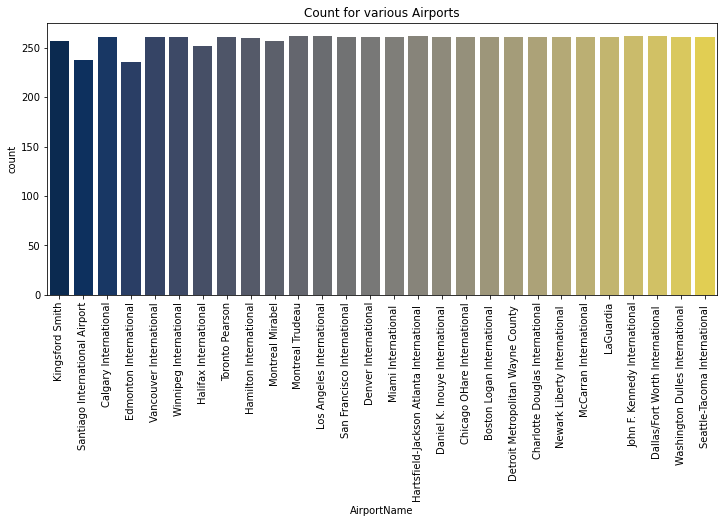

In [9]:
plt.figure(figsize=(12,5))
fig1 = sns.countplot(x = "AirportName", data = dataset , palette="cividis")
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=90)
fig1.set_title("Count for various Airports")
plt.show()

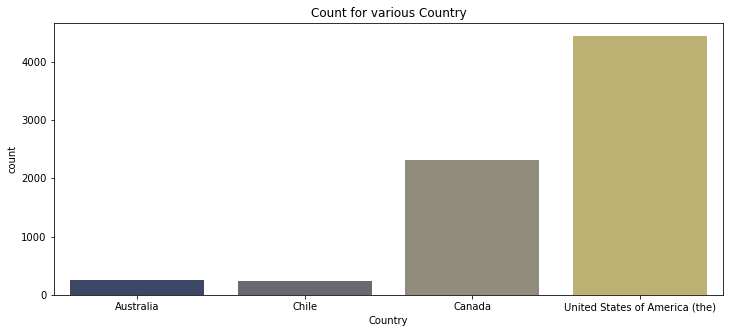

In [10]:
plt.figure(figsize=(12,5))
fig2 = sns.countplot(x = "Country", data = dataset , palette="cividis")
fig2.set_xticklabels(fig2.get_xticklabels())
fig2.set_title("Count for various Country")
plt.show()

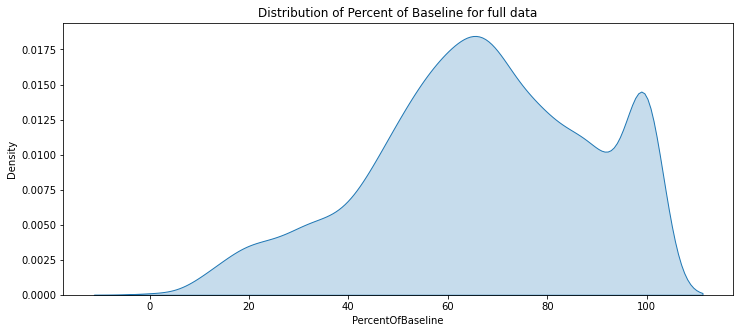

In [11]:
plt.figure(figsize=(12,5))
sns.kdeplot(dataset["PercentOfBaseline"],shade=True)
plt.title("Distribution of Percent of Baseline for full data")
plt.show()

In [12]:
dataset

,Date,AirportName,PercentOfBaseline,City,State,Country
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,Australia
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,Australia
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,Australia
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,Australia
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,Australia
...,...,...,...,...,...,...
7242,2020-06-05,Seattle-Tacoma International,80,SeaTac,Washington,United States of America (the)
7243,2020-10-03,Seattle-Tacoma International,55,SeaTac,Washington,United States of America (the)
7244,2020-07-16,Seattle-Tacoma International,76,SeaTac,Washington,United States of America (the)
7245,2020-07-31,Seattle-Tacoma International,69,SeaTac,Washington,United States of America (the)


In [13]:
le = LabelEncoder()
dataset["Date_1"] = le.fit_transform(dataset.Date)
dataset["AirportName_1"] = le.fit_transform(dataset.AirportName)
dataset["City_1"] = le.fit_transform(dataset.City)
dataset["State_1"] = le.fit_transform(dataset.State)
dataset["Country"] = le.fit_transform(dataset.Country)

In [14]:
dataset

,Date,AirportName,PercentOfBaseline,City,State,Country,Date_1,AirportName_1,City_1,State_1
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,0,18,13,24,13
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,0,28,13,24,13
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,0,116,13,24,13
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,0,170,13,24,13
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,0,229,13,24,13
...,...,...,...,...,...,...,...,...,...,...
7242,2020-06-05,Seattle-Tacoma International,80,SeaTac,Washington,3,81,23,22,22
7243,2020-10-03,Seattle-Tacoma International,55,SeaTac,Washington,3,201,23,22,22
7244,2020-07-16,Seattle-Tacoma International,76,SeaTac,Washington,3,122,23,22,22
7245,2020-07-31,Seattle-Tacoma International,69,SeaTac,Washington,3,137,23,22,22


In [15]:
X = dataset.iloc[:,[5,6,7,8,9]]
y = dataset.PercentOfBaseline

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## KNearest Neighbors

In [17]:
knn = KNeighborsRegressor(n_neighbors=5,metric="manhattan")
knn.fit(X_train,y_train)
y_predict_knn = knn.predict(X_test)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_predict_knn))
mse_knn = mean_absolute_error(y_test,y_predict_knn)
r2_knn = r2_score(y_test, y_predict_knn)
print("Testing performance for KNN")
print("RMSE: {:.2f}".format(rmse_knn))
print("MSE: {:.2f}".format(mse_knn))
print("R2: {:.2f}".format(r2_knn))

Testing performance for KNN
RMSE: 13.22
MSE: 9.47
R2: 0.64


## Catboost

In [18]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

model = cb.CatBoostRegressor(loss_function="RMSE")
grid = {"iterations": [100, 150, 200],"learning_rate": [0.03, 0.1],"depth": [2, 4, 6, 8],"l2_leaf_reg": [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 68.2963444	test: 68.3512878	best: 68.3512878 (0)	total: 147ms	remaining: 14.6s
1:	learn: 66.4507881	test: 66.4934546	best: 66.4934546 (1)	total: 148ms	remaining: 7.24s
2:	learn: 64.6751291	test: 64.7101959	best: 64.7101959 (2)	total: 149ms	remaining: 4.8s
3:	learn: 62.9481911	test: 62.9845391	best: 62.9845391 (3)	total: 149ms	remaining: 3.58s
4:	learn: 61.2892683	test: 61.3186653	best: 61.3186653 (4)	total: 150ms	remaining: 2.85s
5:	learn: 59.6712454	test: 59.6948109	best: 59.6948109 (5)	total: 151ms	remaining: 2.36s
6:	learn: 58.1157867	test: 58.1413680	best: 58.1413680 (6)	total: 152ms	remaining: 2.01s
7:	learn: 56.6017554	test: 56.6189437	best: 56.6189437 (7)	total: 152ms	remaining: 1.75s
8:	learn: 55.1536340	test: 55.1685866	best: 55.1685866 (8)	total: 153ms	remaining: 1.55s
9:	learn: 53.7479758	test: 53.7553181	best: 53.7553181 (9)	total: 154ms	remaining: 1.38s
10:	learn: 52.3959217	test: 52.4020723	best: 52.4020723 (10)	total: 155ms	remaining: 1.25s
11:	learn: 51.084798

52:	learn: 23.9099490	test: 23.6333316	best: 23.6333316 (52)	total: 33.3ms	remaining: 29.5ms
53:	learn: 23.6241979	test: 23.3346049	best: 23.3346049 (53)	total: 34ms	remaining: 28.9ms
54:	learn: 23.3906646	test: 23.0946056	best: 23.0946056 (54)	total: 34.6ms	remaining: 28.3ms
55:	learn: 23.1646757	test: 22.8632519	best: 22.8632519 (55)	total: 35.3ms	remaining: 27.8ms
56:	learn: 22.9073605	test: 22.5913075	best: 22.5913075 (56)	total: 36ms	remaining: 27.2ms
57:	learn: 22.7093007	test: 22.3843797	best: 22.3843797 (57)	total: 36.7ms	remaining: 26.6ms
58:	learn: 22.5134451	test: 22.1850408	best: 22.1850408 (58)	total: 37.4ms	remaining: 26ms
59:	learn: 22.3258882	test: 21.9870255	best: 21.9870255 (59)	total: 38ms	remaining: 25.4ms
60:	learn: 22.1441383	test: 21.8004398	best: 21.8004398 (60)	total: 38.7ms	remaining: 24.7ms
61:	learn: 21.9687986	test: 21.6239348	best: 21.6239348 (61)	total: 39.3ms	remaining: 24.1ms
62:	learn: 21.8076925	test: 21.4629130	best: 21.4629130 (62)	total: 40ms	remai

24:	learn: 19.2824248	test: 18.8412915	best: 18.8412915 (24)	total: 15.8ms	remaining: 47.3ms
25:	learn: 19.0724818	test: 18.6165783	best: 18.6165783 (25)	total: 16.4ms	remaining: 46.7ms
26:	learn: 18.8630060	test: 18.3922518	best: 18.3922518 (26)	total: 17ms	remaining: 46ms
27:	learn: 18.6745261	test: 18.1868220	best: 18.1868220 (27)	total: 17.7ms	remaining: 45.4ms
28:	learn: 18.5319746	test: 18.0466091	best: 18.0466091 (28)	total: 18.3ms	remaining: 44.7ms
29:	learn: 18.4145658	test: 17.9370150	best: 17.9370150 (29)	total: 18.9ms	remaining: 44.1ms
30:	learn: 18.3085174	test: 17.8147535	best: 17.8147535 (30)	total: 19.5ms	remaining: 43.5ms
31:	learn: 18.2108514	test: 17.7169573	best: 17.7169573 (31)	total: 20.2ms	remaining: 42.8ms
32:	learn: 18.1149493	test: 17.6395363	best: 17.6395363 (32)	total: 20.8ms	remaining: 42.2ms
33:	learn: 18.0314655	test: 17.5565316	best: 17.5565316 (33)	total: 21.4ms	remaining: 41.5ms
34:	learn: 17.9409210	test: 17.4807324	best: 17.4807324 (34)	total: 22ms	r

1:	learn: 66.4507881	test: 66.4934546	best: 66.4934546 (1)	total: 1.53ms	remaining: 113ms
2:	learn: 64.6751291	test: 64.7101959	best: 64.7101959 (2)	total: 2.16ms	remaining: 106ms
3:	learn: 62.9481911	test: 62.9845391	best: 62.9845391 (3)	total: 2.79ms	remaining: 102ms
4:	learn: 61.2892683	test: 61.3186653	best: 61.3186653 (4)	total: 3.4ms	remaining: 98.5ms
5:	learn: 59.6712454	test: 59.6948109	best: 59.6948109 (5)	total: 4ms	remaining: 96.1ms
6:	learn: 58.1157867	test: 58.1413680	best: 58.1413680 (6)	total: 4.61ms	remaining: 94.1ms
7:	learn: 56.6017554	test: 56.6189437	best: 56.6189437 (7)	total: 5.24ms	remaining: 93ms
8:	learn: 55.1536340	test: 55.1685866	best: 55.1685866 (8)	total: 5.85ms	remaining: 91.6ms
9:	learn: 53.7479758	test: 53.7553181	best: 53.7553181 (9)	total: 6.45ms	remaining: 90.4ms
10:	learn: 52.3959217	test: 52.4020723	best: 52.4020723 (10)	total: 7.07ms	remaining: 89.4ms
11:	learn: 51.0847981	test: 51.0879758	best: 51.0879758 (11)	total: 7.71ms	remaining: 88.7ms
12:	

129:	learn: 14.7260883	test: 14.4044882	best: 14.4044882 (129)	total: 79.9ms	remaining: 12.3ms
130:	learn: 14.7133320	test: 14.4035040	best: 14.4035040 (130)	total: 80.6ms	remaining: 11.7ms
131:	learn: 14.6836247	test: 14.3954376	best: 14.3954376 (131)	total: 81.3ms	remaining: 11.1ms
132:	learn: 14.6683178	test: 14.3836627	best: 14.3836627 (132)	total: 81.9ms	remaining: 10.5ms
133:	learn: 14.6512921	test: 14.3614387	best: 14.3614387 (133)	total: 82.5ms	remaining: 9.85ms
134:	learn: 14.6390528	test: 14.3491028	best: 14.3491028 (134)	total: 83.1ms	remaining: 9.23ms
135:	learn: 14.6274746	test: 14.3383080	best: 14.3383080 (135)	total: 83.7ms	remaining: 8.62ms
136:	learn: 14.6057962	test: 14.3142372	best: 14.3142372 (136)	total: 84.4ms	remaining: 8.01ms
137:	learn: 14.5952427	test: 14.3142988	best: 14.3142372 (136)	total: 85ms	remaining: 7.39ms
138:	learn: 14.5780771	test: 14.2961713	best: 14.2961713 (138)	total: 85.6ms	remaining: 6.78ms
139:	learn: 14.5667668	test: 14.2860039	best: 14.286

87:	learn: 15.5494767	test: 15.1291919	best: 15.1291919 (87)	total: 60.8ms	remaining: 42.8ms
88:	learn: 15.5335152	test: 15.1186838	best: 15.1186838 (88)	total: 61.5ms	remaining: 42.2ms
89:	learn: 15.5052425	test: 15.0781617	best: 15.0781617 (89)	total: 62.2ms	remaining: 41.5ms
90:	learn: 15.4902140	test: 15.0580834	best: 15.0580834 (90)	total: 62.9ms	remaining: 40.8ms
91:	learn: 15.4638529	test: 15.0299148	best: 15.0299148 (91)	total: 63.5ms	remaining: 40ms
92:	learn: 15.4413512	test: 15.0126047	best: 15.0126047 (92)	total: 64.2ms	remaining: 39.3ms
93:	learn: 15.4278232	test: 15.0055624	best: 15.0055624 (93)	total: 64.9ms	remaining: 38.6ms
94:	learn: 15.4095371	test: 14.9918215	best: 14.9918215 (94)	total: 65.5ms	remaining: 37.9ms
95:	learn: 15.3677986	test: 14.9472622	best: 14.9472622 (95)	total: 66.1ms	remaining: 37.2ms
96:	learn: 15.3315916	test: 14.9365615	best: 14.9365615 (96)	total: 66.8ms	remaining: 36.5ms
97:	learn: 15.2832907	test: 14.8858064	best: 14.8858064 (97)	total: 67.4

53:	learn: 16.7700674	test: 16.3345362	best: 16.3345362 (53)	total: 35.6ms	remaining: 63.3ms
54:	learn: 16.6918191	test: 16.2561080	best: 16.2561080 (54)	total: 36.3ms	remaining: 62.8ms
55:	learn: 16.6589266	test: 16.2299032	best: 16.2299032 (55)	total: 37ms	remaining: 62.2ms
56:	learn: 16.6102644	test: 16.1748401	best: 16.1748401 (56)	total: 37.7ms	remaining: 61.6ms
57:	learn: 16.5510683	test: 16.1119064	best: 16.1119064 (57)	total: 38.3ms	remaining: 60.8ms
58:	learn: 16.5236390	test: 16.0831523	best: 16.0831523 (58)	total: 39ms	remaining: 60.1ms
59:	learn: 16.4843240	test: 16.0506460	best: 16.0506460 (59)	total: 39.6ms	remaining: 59.4ms
60:	learn: 16.3981392	test: 15.9598089	best: 15.9598089 (60)	total: 40.3ms	remaining: 58.8ms
61:	learn: 16.3683693	test: 15.9457311	best: 15.9457311 (61)	total: 40.9ms	remaining: 58.1ms
62:	learn: 16.3333877	test: 15.9129177	best: 15.9129177 (62)	total: 41.5ms	remaining: 57.3ms
63:	learn: 16.3059444	test: 15.8811887	best: 15.8811887 (63)	total: 42.2ms

24:	learn: 19.2754379	test: 18.8433761	best: 18.8433761 (24)	total: 15.7ms	remaining: 78.4ms
25:	learn: 19.0638398	test: 18.6163427	best: 18.6163427 (25)	total: 16.3ms	remaining: 77.9ms
26:	learn: 18.8515146	test: 18.3897357	best: 18.3897357 (26)	total: 17.1ms	remaining: 77.9ms
27:	learn: 18.6612530	test: 18.1828967	best: 18.1828967 (27)	total: 17.7ms	remaining: 77.3ms
28:	learn: 18.5296128	test: 18.0536009	best: 18.0536009 (28)	total: 18.4ms	remaining: 76.7ms
29:	learn: 18.4413690	test: 17.9727704	best: 17.9727704 (29)	total: 19ms	remaining: 76ms
30:	learn: 18.3374120	test: 17.8525907	best: 17.8525907 (30)	total: 19.7ms	remaining: 75.5ms
31:	learn: 18.2380935	test: 17.7570087	best: 17.7570087 (31)	total: 20.3ms	remaining: 74.8ms
32:	learn: 18.1261410	test: 17.6635320	best: 17.6635320 (32)	total: 20.9ms	remaining: 74.3ms
33:	learn: 18.0507014	test: 17.5880355	best: 17.5880355 (33)	total: 21.6ms	remaining: 73.6ms
34:	learn: 17.9668288	test: 17.5183475	best: 17.5183475 (34)	total: 22.2ms

149:	learn: 17.2197749	test: 16.7919833	best: 16.7919833 (149)	total: 94.9ms	remaining: 31.6ms
150:	learn: 17.2090269	test: 16.7853082	best: 16.7853082 (150)	total: 95.6ms	remaining: 31ms
151:	learn: 17.1937438	test: 16.7709366	best: 16.7709366 (151)	total: 96.2ms	remaining: 30.4ms
152:	learn: 17.1835816	test: 16.7621756	best: 16.7621756 (152)	total: 96.9ms	remaining: 29.8ms
153:	learn: 17.1711529	test: 16.7477914	best: 16.7477914 (153)	total: 97.5ms	remaining: 29.1ms
154:	learn: 17.1596578	test: 16.7375472	best: 16.7375472 (154)	total: 98.1ms	remaining: 28.5ms
155:	learn: 17.1482066	test: 16.7261523	best: 16.7261523 (155)	total: 98.7ms	remaining: 27.8ms
156:	learn: 17.1355210	test: 16.7122575	best: 16.7122575 (156)	total: 99.3ms	remaining: 27.2ms
157:	learn: 17.1258886	test: 16.7045906	best: 16.7045906 (157)	total: 99.9ms	remaining: 26.6ms
158:	learn: 17.1154317	test: 16.6953115	best: 16.6953115 (158)	total: 101ms	remaining: 25.9ms
159:	learn: 17.0995961	test: 16.6841877	best: 16.6841

20:	learn: 41.1725455	test: 41.1403662	best: 41.1403662 (20)	total: 13.7ms	remaining: 117ms
21:	learn: 40.2582179	test: 40.2228972	best: 40.2228972 (21)	total: 14.4ms	remaining: 117ms
22:	learn: 39.3725927	test: 39.3325091	best: 39.3325091 (22)	total: 15.1ms	remaining: 116ms
23:	learn: 38.5201762	test: 38.4746401	best: 38.4746401 (23)	total: 15.7ms	remaining: 115ms
24:	learn: 37.6976820	test: 37.6497124	best: 37.6497124 (24)	total: 16.4ms	remaining: 115ms
25:	learn: 36.9209103	test: 36.8667791	best: 36.8667791 (25)	total: 17ms	remaining: 114ms
26:	learn: 36.1697954	test: 36.1110131	best: 36.1110131 (26)	total: 17.6ms	remaining: 113ms
27:	learn: 35.4343720	test: 35.3701017	best: 35.3701017 (27)	total: 18.3ms	remaining: 112ms
28:	learn: 34.7272910	test: 34.6585017	best: 34.6585017 (28)	total: 18.9ms	remaining: 112ms
29:	learn: 34.0458321	test: 33.9745285	best: 33.9745285 (29)	total: 19.6ms	remaining: 111ms
30:	learn: 33.3864887	test: 33.3041379	best: 33.3041379 (30)	total: 20.2ms	remaini

92:	learn: 15.4413512	test: 15.0126047	best: 15.0126047 (92)	total: 58.7ms	remaining: 67.6ms
93:	learn: 15.4278232	test: 15.0055624	best: 15.0055624 (93)	total: 59.3ms	remaining: 66.9ms
94:	learn: 15.4095371	test: 14.9918215	best: 14.9918215 (94)	total: 60ms	remaining: 66.3ms
95:	learn: 15.3677986	test: 14.9472622	best: 14.9472622 (95)	total: 60.6ms	remaining: 65.7ms
96:	learn: 15.3315916	test: 14.9365615	best: 14.9365615 (96)	total: 61.3ms	remaining: 65ms
97:	learn: 15.2832907	test: 14.8858064	best: 14.8858064 (97)	total: 61.9ms	remaining: 64.4ms
98:	learn: 15.2679608	test: 14.8750300	best: 14.8750300 (98)	total: 62.5ms	remaining: 63.8ms
99:	learn: 15.2281706	test: 14.8315527	best: 14.8315527 (99)	total: 63.1ms	remaining: 63.1ms
100:	learn: 15.2156722	test: 14.8284856	best: 14.8284856 (100)	total: 63.7ms	remaining: 62.5ms
101:	learn: 15.2050717	test: 14.8223711	best: 14.8223711 (101)	total: 64.3ms	remaining: 61.8ms
102:	learn: 15.1905301	test: 14.8071768	best: 14.8071768 (102)	total: 

164:	learn: 17.0163041	test: 16.6024432	best: 16.6024432 (164)	total: 106ms	remaining: 22.4ms
165:	learn: 17.0047298	test: 16.5912765	best: 16.5912765 (165)	total: 106ms	remaining: 21.8ms
166:	learn: 16.9947177	test: 16.5835525	best: 16.5835525 (166)	total: 107ms	remaining: 21.1ms
167:	learn: 16.9616303	test: 16.5485566	best: 16.5485566 (167)	total: 108ms	remaining: 20.5ms
168:	learn: 16.9304359	test: 16.5155297	best: 16.5155297 (168)	total: 108ms	remaining: 19.8ms
169:	learn: 16.9128995	test: 16.4962232	best: 16.4962232 (169)	total: 109ms	remaining: 19.2ms
170:	learn: 16.9041048	test: 16.4890493	best: 16.4890493 (170)	total: 109ms	remaining: 18.6ms
171:	learn: 16.8865389	test: 16.4719055	best: 16.4719055 (171)	total: 110ms	remaining: 17.9ms
172:	learn: 16.8575254	test: 16.4412087	best: 16.4412087 (172)	total: 111ms	remaining: 17.3ms
173:	learn: 16.8491230	test: 16.4345995	best: 16.4345995 (173)	total: 111ms	remaining: 16.6ms
174:	learn: 16.8353768	test: 16.4201977	best: 16.4201977 (17

37:	learn: 29.5546533	test: 29.4150615	best: 29.4150615 (37)	total: 24.1ms	remaining: 103ms
38:	learn: 29.0677915	test: 28.9276797	best: 28.9276797 (38)	total: 24.7ms	remaining: 102ms
39:	learn: 28.6171990	test: 28.4706645	best: 28.4706645 (39)	total: 25.4ms	remaining: 101ms
40:	learn: 28.1660758	test: 28.0145607	best: 28.0145607 (40)	total: 26ms	remaining: 101ms
41:	learn: 27.6905036	test: 27.5193650	best: 27.5193650 (41)	total: 26.6ms	remaining: 100ms
42:	learn: 27.3010634	test: 27.1231377	best: 27.1231377 (42)	total: 27.2ms	remaining: 99.4ms
43:	learn: 26.8791629	test: 26.6938458	best: 26.6938458 (43)	total: 27.8ms	remaining: 98.7ms
44:	learn: 26.5069575	test: 26.3065000	best: 26.3065000 (44)	total: 28.5ms	remaining: 98.1ms
45:	learn: 26.1461984	test: 25.9315873	best: 25.9315873 (45)	total: 29.1ms	remaining: 97.3ms
46:	learn: 25.7893332	test: 25.5671476	best: 25.5671476 (46)	total: 29.7ms	remaining: 96.7ms
47:	learn: 25.4153103	test: 25.1753082	best: 25.1753082 (47)	total: 30.3ms	re

113:	learn: 14.9120311	test: 14.5805595	best: 14.5805595 (113)	total: 70.9ms	remaining: 53.5ms
114:	learn: 14.8894788	test: 14.5631876	best: 14.5631876 (114)	total: 71.5ms	remaining: 52.9ms
115:	learn: 14.8785958	test: 14.5509554	best: 14.5509554 (115)	total: 72.1ms	remaining: 52.2ms
116:	learn: 14.8657891	test: 14.5323972	best: 14.5323972 (116)	total: 72.7ms	remaining: 51.6ms
117:	learn: 14.8471382	test: 14.5188253	best: 14.5188253 (117)	total: 73.3ms	remaining: 51ms
118:	learn: 14.8373367	test: 14.5152259	best: 14.5152259 (118)	total: 74ms	remaining: 50.3ms
119:	learn: 14.8234127	test: 14.4982226	best: 14.4982226 (119)	total: 74.6ms	remaining: 49.7ms
120:	learn: 14.8082058	test: 14.4876865	best: 14.4876865 (120)	total: 75.2ms	remaining: 49.1ms
121:	learn: 14.7986944	test: 14.4778814	best: 14.4778814 (121)	total: 75.8ms	remaining: 48.5ms
122:	learn: 14.7804277	test: 14.4590729	best: 14.4590729 (122)	total: 76.4ms	remaining: 47.8ms
123:	learn: 14.7674418	test: 14.4469861	best: 14.44698

29:	learn: 16.1634240	test: 15.8696500	best: 15.8696500 (29)	total: 27.3ms	remaining: 63.7ms
30:	learn: 15.9971348	test: 15.7128710	best: 15.7128710 (30)	total: 28.1ms	remaining: 62.6ms
31:	learn: 15.8736615	test: 15.5797641	best: 15.5797641 (31)	total: 29ms	remaining: 61.7ms
32:	learn: 15.7563537	test: 15.4604234	best: 15.4604234 (32)	total: 29.9ms	remaining: 60.8ms
33:	learn: 15.6102363	test: 15.2938578	best: 15.2938578 (33)	total: 30.9ms	remaining: 59.9ms
34:	learn: 15.5353336	test: 15.2374847	best: 15.2374847 (34)	total: 31.8ms	remaining: 59ms
35:	learn: 15.4540296	test: 15.1548129	best: 15.1548129 (35)	total: 32.7ms	remaining: 58.1ms
36:	learn: 15.3897861	test: 15.0717914	best: 15.0717914 (36)	total: 33.6ms	remaining: 57.2ms
37:	learn: 15.3198733	test: 15.0363348	best: 15.0363348 (37)	total: 34.5ms	remaining: 56.3ms
38:	learn: 15.2041292	test: 14.9381324	best: 14.9381324 (38)	total: 35.4ms	remaining: 55.3ms
39:	learn: 15.1244916	test: 14.8418147	best: 14.8418147 (39)	total: 36.3ms

14:	learn: 23.1064433	test: 22.9813792	best: 22.9813792 (14)	total: 17ms	remaining: 96.6ms
15:	learn: 22.1653281	test: 22.0068116	best: 22.0068116 (15)	total: 18.1ms	remaining: 95.2ms
16:	learn: 21.3455709	test: 21.1583417	best: 21.1583417 (16)	total: 19.2ms	remaining: 93.9ms
17:	learn: 20.5756186	test: 20.3773086	best: 20.3773086 (17)	total: 20.3ms	remaining: 92.3ms
18:	learn: 19.9834850	test: 19.7753673	best: 19.7753673 (18)	total: 21.2ms	remaining: 90.5ms
19:	learn: 19.2544087	test: 19.0471191	best: 19.0471191 (19)	total: 22.3ms	remaining: 89.1ms
20:	learn: 18.8120831	test: 18.5789994	best: 18.5789994 (20)	total: 23.4ms	remaining: 87.9ms
21:	learn: 18.2822297	test: 18.0511620	best: 18.0511620 (21)	total: 24.4ms	remaining: 86.4ms
22:	learn: 17.8014369	test: 17.5871064	best: 17.5871064 (22)	total: 25.4ms	remaining: 85ms
23:	learn: 17.5454297	test: 17.3298511	best: 17.3298511 (23)	total: 26.3ms	remaining: 83.4ms
24:	learn: 17.1804489	test: 16.9679830	best: 16.9679830 (24)	total: 27.3ms

91:	learn: 16.7344216	test: 16.4981005	best: 16.4981005 (91)	total: 86.5ms	remaining: 7.53ms
92:	learn: 16.6759089	test: 16.4355892	best: 16.4355892 (92)	total: 87.4ms	remaining: 6.58ms
93:	learn: 16.6016147	test: 16.3673059	best: 16.3673059 (93)	total: 88.4ms	remaining: 5.64ms
94:	learn: 16.5452500	test: 16.3069765	best: 16.3069765 (94)	total: 89.3ms	remaining: 4.7ms
95:	learn: 16.4850096	test: 16.2502717	best: 16.2502717 (95)	total: 90.4ms	remaining: 3.76ms
96:	learn: 16.4232004	test: 16.1929149	best: 16.1929149 (96)	total: 91.3ms	remaining: 2.82ms
97:	learn: 16.3781026	test: 16.1502612	best: 16.1502612 (97)	total: 92.2ms	remaining: 1.88ms
98:	learn: 16.3015884	test: 16.0753144	best: 16.0753144 (98)	total: 93.1ms	remaining: 940us
99:	learn: 16.2510846	test: 16.0194350	best: 16.0194350 (99)	total: 94.1ms	remaining: 0us

bestTest = 16.019435
bestIteration = 99

28:	loss: 16.0194350	best: 12.9778282 (27)	total: 3.17s	remaining: 7.33s
0:	learn: 63.7267384	test: 63.8143742	best: 63.814374

77:	learn: 17.9817410	test: 17.7537988	best: 17.7537988 (77)	total: 73.2ms	remaining: 20.6ms
78:	learn: 17.8916834	test: 17.6579509	best: 17.6579509 (78)	total: 74.2ms	remaining: 19.7ms
79:	learn: 17.8026861	test: 17.5648798	best: 17.5648798 (79)	total: 75.2ms	remaining: 18.8ms
80:	learn: 17.6978441	test: 17.4638997	best: 17.4638997 (80)	total: 76.1ms	remaining: 17.9ms
81:	learn: 17.6102014	test: 17.3733929	best: 17.3733929 (81)	total: 77.2ms	remaining: 16.9ms
82:	learn: 17.5432234	test: 17.3042118	best: 17.3042118 (82)	total: 78.2ms	remaining: 16ms
83:	learn: 17.4601859	test: 17.2186793	best: 17.2186793 (83)	total: 79.2ms	remaining: 15.1ms
84:	learn: 17.3874408	test: 17.1423744	best: 17.1423744 (84)	total: 80.2ms	remaining: 14.1ms
85:	learn: 17.3217238	test: 17.0794243	best: 17.0794243 (85)	total: 81.1ms	remaining: 13.2ms
86:	learn: 17.2456885	test: 17.0123227	best: 17.0123227 (86)	total: 82.1ms	remaining: 12.3ms
87:	learn: 17.1484656	test: 16.9160649	best: 16.9160649 (87)	total: 83.2

57:	learn: 21.1858967	test: 21.0042440	best: 21.0042440 (57)	total: 54ms	remaining: 85.6ms
58:	learn: 20.9237277	test: 20.7358536	best: 20.7358536 (58)	total: 54.9ms	remaining: 84.7ms
59:	learn: 20.7074661	test: 20.5164770	best: 20.5164770 (59)	total: 55.8ms	remaining: 83.8ms
60:	learn: 20.5113178	test: 20.3133669	best: 20.3133669 (60)	total: 56.8ms	remaining: 82.9ms
61:	learn: 20.3306990	test: 20.1243447	best: 20.1243447 (61)	total: 57.7ms	remaining: 81.9ms
62:	learn: 20.1536533	test: 19.9407737	best: 19.9407737 (62)	total: 58.6ms	remaining: 80.9ms
63:	learn: 19.9714566	test: 19.7488419	best: 19.7488419 (63)	total: 59.5ms	remaining: 79.9ms
64:	learn: 19.8015294	test: 19.5696610	best: 19.5696610 (64)	total: 60.4ms	remaining: 79ms
65:	learn: 19.5908942	test: 19.3601599	best: 19.3601599 (65)	total: 61.7ms	remaining: 78.6ms
66:	learn: 19.4223119	test: 19.1959017	best: 19.1959017 (66)	total: 62.7ms	remaining: 77.7ms
67:	learn: 19.2526184	test: 19.0167021	best: 19.0167021 (67)	total: 63.7ms

96:	learn: 13.2191508	test: 13.0552539	best: 13.0552539 (96)	total: 89.3ms	remaining: 48.8ms
97:	learn: 13.2061627	test: 13.0554907	best: 13.0552539 (96)	total: 90.3ms	remaining: 47.9ms
98:	learn: 13.1880434	test: 13.0352341	best: 13.0352341 (98)	total: 91.2ms	remaining: 47ms
99:	learn: 13.1649627	test: 13.0182655	best: 13.0182655 (99)	total: 92.1ms	remaining: 46.1ms
100:	learn: 13.1461276	test: 12.9966658	best: 12.9966658 (100)	total: 93.1ms	remaining: 45.2ms
101:	learn: 13.1312192	test: 12.9801580	best: 12.9801580 (101)	total: 94ms	remaining: 44.2ms
102:	learn: 13.1059839	test: 12.9611316	best: 12.9611316 (102)	total: 94.9ms	remaining: 43.3ms
103:	learn: 13.0865320	test: 12.9458495	best: 12.9458495 (103)	total: 95.8ms	remaining: 42.4ms
104:	learn: 13.0488726	test: 12.9415546	best: 12.9415546 (104)	total: 96.6ms	remaining: 41.4ms
105:	learn: 13.0310699	test: 12.9162143	best: 12.9162143 (105)	total: 97.6ms	remaining: 40.5ms
106:	learn: 13.0209934	test: 12.9121865	best: 12.9121865 (106)

132:	learn: 15.2112485	test: 14.9574297	best: 14.9574297 (132)	total: 126ms	remaining: 16.1ms
133:	learn: 15.1851573	test: 14.9265873	best: 14.9265873 (133)	total: 127ms	remaining: 15.2ms
134:	learn: 15.1696720	test: 14.9089479	best: 14.9089479 (134)	total: 128ms	remaining: 14.2ms
135:	learn: 15.1469628	test: 14.8845344	best: 14.8845344 (135)	total: 129ms	remaining: 13.3ms
136:	learn: 15.1311440	test: 14.8688920	best: 14.8688920 (136)	total: 130ms	remaining: 12.3ms
137:	learn: 15.1128061	test: 14.8539446	best: 14.8539446 (137)	total: 131ms	remaining: 11.4ms
138:	learn: 15.0817991	test: 14.8263642	best: 14.8263642 (138)	total: 132ms	remaining: 10.4ms
139:	learn: 15.0648616	test: 14.8107033	best: 14.8107033 (139)	total: 133ms	remaining: 9.47ms
140:	learn: 15.0485904	test: 14.7946327	best: 14.7946327 (140)	total: 133ms	remaining: 8.52ms
141:	learn: 15.0062238	test: 14.7536036	best: 14.7536036 (141)	total: 134ms	remaining: 7.57ms
142:	learn: 14.9854889	test: 14.7260136	best: 14.7260136 (14

18:	learn: 42.6167522	test: 42.6505145	best: 42.6505145 (18)	total: 17.3ms	remaining: 119ms
19:	learn: 41.6076484	test: 41.6491332	best: 41.6491332 (19)	total: 18.3ms	remaining: 119ms
20:	learn: 40.6491178	test: 40.6771394	best: 40.6771394 (20)	total: 19.3ms	remaining: 118ms
21:	learn: 39.6759266	test: 39.6972590	best: 39.6972590 (21)	total: 20.2ms	remaining: 118ms
22:	learn: 38.7655520	test: 38.7791758	best: 38.7791758 (22)	total: 21.2ms	remaining: 117ms
23:	learn: 37.8906392	test: 37.9023456	best: 37.9023456 (23)	total: 22.2ms	remaining: 117ms
24:	learn: 37.0184789	test: 37.0231995	best: 37.0231995 (24)	total: 23.2ms	remaining: 116ms
25:	learn: 36.2248853	test: 36.2183634	best: 36.2183634 (25)	total: 24.2ms	remaining: 115ms
26:	learn: 35.4362400	test: 35.4317463	best: 35.4317463 (26)	total: 25.3ms	remaining: 115ms
27:	learn: 34.6326139	test: 34.6242289	best: 34.6242289 (27)	total: 26.3ms	remaining: 114ms
28:	learn: 33.8898553	test: 33.8800687	best: 33.8800687 (28)	total: 27.3ms	remai

50:	learn: 14.4790722	test: 14.2106801	best: 14.2106801 (50)	total: 49.4ms	remaining: 95.8ms
51:	learn: 14.4504755	test: 14.1792975	best: 14.1792975 (51)	total: 50.3ms	remaining: 94.8ms
52:	learn: 14.3713806	test: 14.1343987	best: 14.1343987 (52)	total: 51.2ms	remaining: 93.8ms
53:	learn: 14.3449845	test: 14.1083559	best: 14.1083559 (53)	total: 52.2ms	remaining: 92.8ms
54:	learn: 14.2811756	test: 14.0602728	best: 14.0602728 (54)	total: 53.2ms	remaining: 92ms
55:	learn: 14.2399246	test: 14.0277452	best: 14.0277452 (55)	total: 54.2ms	remaining: 91.1ms
56:	learn: 14.2083280	test: 14.0030914	best: 14.0030914 (56)	total: 55.2ms	remaining: 90.1ms
57:	learn: 14.1913735	test: 13.9820758	best: 13.9820758 (57)	total: 56.2ms	remaining: 89.2ms
58:	learn: 14.1606375	test: 13.9494241	best: 13.9494241 (58)	total: 57.2ms	remaining: 88.2ms
59:	learn: 14.1389210	test: 13.9229870	best: 13.9229870 (59)	total: 58.2ms	remaining: 87.3ms
60:	learn: 14.0779527	test: 13.8531495	best: 13.8531495 (60)	total: 59.4

79:	learn: 17.8026861	test: 17.5648798	best: 17.5648798 (79)	total: 77.7ms	remaining: 68ms
80:	learn: 17.6978441	test: 17.4638997	best: 17.4638997 (80)	total: 78.8ms	remaining: 67.1ms
81:	learn: 17.6102014	test: 17.3733929	best: 17.3733929 (81)	total: 79.8ms	remaining: 66.2ms
82:	learn: 17.5432234	test: 17.3042118	best: 17.3042118 (82)	total: 80.8ms	remaining: 65.2ms
83:	learn: 17.4601859	test: 17.2186793	best: 17.2186793 (83)	total: 81.8ms	remaining: 64.3ms
84:	learn: 17.3874408	test: 17.1423744	best: 17.1423744 (84)	total: 82.8ms	remaining: 63.3ms
85:	learn: 17.3217238	test: 17.0794243	best: 17.0794243 (85)	total: 83.7ms	remaining: 62.3ms
86:	learn: 17.2456885	test: 17.0123227	best: 17.0123227 (86)	total: 84.6ms	remaining: 61.3ms
87:	learn: 17.1484656	test: 16.9160649	best: 16.9160649 (87)	total: 85.6ms	remaining: 60.3ms
88:	learn: 17.0532013	test: 16.8239850	best: 16.8239850 (88)	total: 86.6ms	remaining: 59.3ms
89:	learn: 16.9840968	test: 16.7540871	best: 16.7540871 (89)	total: 87.8

114:	learn: 13.0292006	test: 12.9510341	best: 12.9510341 (114)	total: 107ms	remaining: 32.4ms
115:	learn: 13.0148595	test: 12.9342807	best: 12.9342807 (115)	total: 108ms	remaining: 31.5ms
116:	learn: 12.9997681	test: 12.9228919	best: 12.9228919 (116)	total: 109ms	remaining: 30.7ms
117:	learn: 12.9810456	test: 12.9039958	best: 12.9039958 (117)	total: 110ms	remaining: 29.7ms
118:	learn: 12.9631713	test: 12.8779919	best: 12.8779919 (118)	total: 111ms	remaining: 28.8ms
119:	learn: 12.9322609	test: 12.8649740	best: 12.8649740 (119)	total: 112ms	remaining: 27.9ms
120:	learn: 12.9258011	test: 12.8674886	best: 12.8649740 (119)	total: 113ms	remaining: 27ms
121:	learn: 12.9187783	test: 12.8626007	best: 12.8626007 (121)	total: 113ms	remaining: 26ms
122:	learn: 12.9066397	test: 12.8483731	best: 12.8483731 (122)	total: 115ms	remaining: 25.1ms
123:	learn: 12.8967736	test: 12.8430773	best: 12.8430773 (123)	total: 116ms	remaining: 24.2ms
124:	learn: 12.8849200	test: 12.8292132	best: 12.8292132 (124)	t

124:	learn: 15.4131283	test: 15.1531129	best: 15.1531129 (124)	total: 131ms	remaining: 78.5ms
125:	learn: 15.3748381	test: 15.1171463	best: 15.1171463 (125)	total: 132ms	remaining: 77.5ms
126:	learn: 15.3430737	test: 15.0843719	best: 15.0843719 (126)	total: 133ms	remaining: 76.4ms
127:	learn: 15.3153534	test: 15.0534632	best: 15.0534632 (127)	total: 134ms	remaining: 75.4ms
128:	learn: 15.2799297	test: 15.0203340	best: 15.0203340 (128)	total: 135ms	remaining: 74.4ms
129:	learn: 15.2607051	test: 14.9995525	best: 14.9995525 (129)	total: 136ms	remaining: 73.3ms
130:	learn: 15.2383082	test: 14.9710321	best: 14.9710321 (130)	total: 137ms	remaining: 72.3ms
131:	learn: 15.2047855	test: 14.9350599	best: 14.9350599 (131)	total: 138ms	remaining: 71.2ms
132:	learn: 15.1854687	test: 14.9092948	best: 14.9092948 (132)	total: 139ms	remaining: 70.1ms
133:	learn: 15.1597037	test: 14.8790110	best: 14.8790110 (133)	total: 140ms	remaining: 69ms
134:	learn: 15.1446782	test: 14.8620103	best: 14.8620103 (134)

72:	learn: 13.8678005	test: 13.6110997	best: 13.6110997 (72)	total: 81.5ms	remaining: 142ms
73:	learn: 13.8353223	test: 13.5741624	best: 13.5741624 (73)	total: 82.5ms	remaining: 140ms
74:	learn: 13.8044060	test: 13.5485247	best: 13.5485247 (74)	total: 83.6ms	remaining: 139ms
75:	learn: 13.7639932	test: 13.5081373	best: 13.5081373 (75)	total: 84.7ms	remaining: 138ms
76:	learn: 13.7300020	test: 13.4791300	best: 13.4791300 (76)	total: 85.9ms	remaining: 137ms
77:	learn: 13.6995571	test: 13.4587673	best: 13.4587673 (77)	total: 87ms	remaining: 136ms
78:	learn: 13.6803824	test: 13.4469895	best: 13.4469895 (78)	total: 88ms	remaining: 135ms
79:	learn: 13.6517327	test: 13.4110401	best: 13.4110401 (79)	total: 89.1ms	remaining: 134ms
80:	learn: 13.6244019	test: 13.3776514	best: 13.3776514 (80)	total: 90.2ms	remaining: 133ms
81:	learn: 13.5938907	test: 13.3392273	best: 13.3392273 (81)	total: 91.3ms	remaining: 131ms
82:	learn: 13.5368551	test: 13.3192457	best: 13.3192457 (82)	total: 92.2ms	remaining

53:	learn: 22.2038846	test: 22.0461631	best: 22.0461631 (53)	total: 52.3ms	remaining: 141ms
54:	learn: 21.9420239	test: 21.7793154	best: 21.7793154 (54)	total: 53.4ms	remaining: 141ms
55:	learn: 21.7057165	test: 21.5335039	best: 21.5335039 (55)	total: 54.4ms	remaining: 140ms
56:	learn: 21.4532988	test: 21.2798689	best: 21.2798689 (56)	total: 55.4ms	remaining: 139ms
57:	learn: 21.1964106	test: 21.0150996	best: 21.0150996 (57)	total: 56.5ms	remaining: 138ms
58:	learn: 20.9341112	test: 20.7465803	best: 20.7465803 (58)	total: 57.5ms	remaining: 138ms
59:	learn: 20.7177916	test: 20.5271364	best: 20.5271364 (59)	total: 58.5ms	remaining: 137ms
60:	learn: 20.5214900	test: 20.3238773	best: 20.3238773 (60)	total: 59.7ms	remaining: 136ms
61:	learn: 20.3428675	test: 20.1427527	best: 20.1427527 (61)	total: 60.7ms	remaining: 135ms
62:	learn: 20.1446163	test: 19.9363355	best: 19.9363355 (62)	total: 61.8ms	remaining: 134ms
63:	learn: 19.9684188	test: 19.7568005	best: 19.7568005 (63)	total: 63ms	remaini

18:	learn: 19.9834850	test: 19.7753673	best: 19.7753673 (18)	total: 22.5ms	remaining: 214ms
19:	learn: 19.2544087	test: 19.0471191	best: 19.0471191 (19)	total: 23.8ms	remaining: 214ms
20:	learn: 18.8120831	test: 18.5789994	best: 18.5789994 (20)	total: 24.9ms	remaining: 212ms
21:	learn: 18.2822297	test: 18.0511620	best: 18.0511620 (21)	total: 26ms	remaining: 211ms
22:	learn: 17.8014369	test: 17.5871064	best: 17.5871064 (22)	total: 27.1ms	remaining: 208ms
23:	learn: 17.5454297	test: 17.3298511	best: 17.3298511 (23)	total: 28.1ms	remaining: 206ms
24:	learn: 17.1804489	test: 16.9679830	best: 16.9679830 (24)	total: 29.1ms	remaining: 203ms
25:	learn: 16.9710168	test: 16.7507251	best: 16.7507251 (25)	total: 30.1ms	remaining: 201ms
26:	learn: 16.7774112	test: 16.5430090	best: 16.5430090 (26)	total: 31ms	remaining: 199ms
27:	learn: 16.5714194	test: 16.3204246	best: 16.3204246 (27)	total: 32.1ms	remaining: 197ms
28:	learn: 16.3253307	test: 16.0502135	best: 16.0502135 (28)	total: 33.2ms	remaining

1:	learn: 66.3989343	test: 66.4662786	best: 66.4662786 (1)	total: 2.24ms	remaining: 221ms
2:	learn: 64.5916238	test: 64.6711426	best: 64.6711426 (2)	total: 3.85ms	remaining: 253ms
3:	learn: 62.8614043	test: 62.9398775	best: 62.9398775 (3)	total: 4.84ms	remaining: 237ms
4:	learn: 61.1748304	test: 61.2511820	best: 61.2511820 (4)	total: 5.84ms	remaining: 228ms
5:	learn: 59.5634587	test: 59.6383116	best: 59.6383116 (5)	total: 6.6ms	remaining: 214ms
6:	learn: 57.9615020	test: 58.0291691	best: 58.0291691 (6)	total: 7.57ms	remaining: 209ms
7:	learn: 56.4257861	test: 56.4915882	best: 56.4915882 (7)	total: 8.57ms	remaining: 206ms
8:	learn: 54.9665533	test: 55.0270285	best: 55.0270285 (8)	total: 9.64ms	remaining: 205ms
9:	learn: 53.5456381	test: 53.6076023	best: 53.6076023 (9)	total: 10.6ms	remaining: 202ms
10:	learn: 52.1855102	test: 52.2448790	best: 52.2448790 (10)	total: 11.3ms	remaining: 193ms
11:	learn: 50.8210213	test: 50.8792402	best: 50.8792402 (11)	total: 12.2ms	remaining: 191ms
12:	lea

182:	learn: 14.3122153	test: 14.0655999	best: 14.0655999 (182)	total: 178ms	remaining: 16.5ms
183:	learn: 14.3002516	test: 14.0522981	best: 14.0522981 (183)	total: 179ms	remaining: 15.6ms
184:	learn: 14.2910974	test: 14.0385547	best: 14.0385547 (184)	total: 180ms	remaining: 14.6ms
185:	learn: 14.2772419	test: 14.0269465	best: 14.0269465 (185)	total: 181ms	remaining: 13.6ms
186:	learn: 14.2689027	test: 14.0194880	best: 14.0194880 (186)	total: 182ms	remaining: 12.6ms
187:	learn: 14.2615322	test: 14.0124650	best: 14.0124650 (187)	total: 183ms	remaining: 11.7ms
188:	learn: 14.2517748	test: 14.0037826	best: 14.0037826 (188)	total: 184ms	remaining: 10.7ms
189:	learn: 14.2403741	test: 13.9925066	best: 13.9925066 (189)	total: 185ms	remaining: 9.74ms
190:	learn: 14.2236405	test: 13.9750903	best: 13.9750903 (190)	total: 186ms	remaining: 8.77ms
191:	learn: 14.2112794	test: 13.9623274	best: 13.9623274 (191)	total: 187ms	remaining: 7.79ms
192:	learn: 14.1980900	test: 13.9489509	best: 13.9489509 (19

153:	learn: 12.3104198	test: 12.4666493	best: 12.4666493 (153)	total: 154ms	remaining: 46ms
154:	learn: 12.2804001	test: 12.4409066	best: 12.4409066 (154)	total: 155ms	remaining: 45ms
155:	learn: 12.2662190	test: 12.4386372	best: 12.4386372 (155)	total: 156ms	remaining: 44ms
156:	learn: 12.2486253	test: 12.4394082	best: 12.4386372 (155)	total: 157ms	remaining: 43ms
157:	learn: 12.2244065	test: 12.4091286	best: 12.4091286 (157)	total: 158ms	remaining: 42ms
158:	learn: 12.2105721	test: 12.3992673	best: 12.3992673 (158)	total: 159ms	remaining: 41.1ms
159:	learn: 12.1964842	test: 12.3876916	best: 12.3876916 (159)	total: 160ms	remaining: 40ms
160:	learn: 12.1809688	test: 12.3756018	best: 12.3756018 (160)	total: 161ms	remaining: 39ms
161:	learn: 12.1641843	test: 12.3510418	best: 12.3510418 (161)	total: 162ms	remaining: 38.1ms
162:	learn: 12.1589112	test: 12.3427238	best: 12.3427238 (162)	total: 163ms	remaining: 37.1ms
163:	learn: 12.1528449	test: 12.3355026	best: 12.3355026 (163)	total: 164m

122:	learn: 15.4641712	test: 15.2019920	best: 15.2019920 (122)	total: 130ms	remaining: 81.3ms
123:	learn: 15.4268177	test: 15.1635474	best: 15.1635474 (123)	total: 131ms	remaining: 80.3ms
124:	learn: 15.4060348	test: 15.1409953	best: 15.1409953 (124)	total: 132ms	remaining: 79.2ms
125:	learn: 15.3736923	test: 15.1097863	best: 15.1097863 (125)	total: 133ms	remaining: 78.2ms
126:	learn: 15.3323619	test: 15.0679230	best: 15.0679230 (126)	total: 134ms	remaining: 77ms
127:	learn: 15.3158224	test: 15.0499985	best: 15.0499985 (127)	total: 135ms	remaining: 75.9ms
128:	learn: 15.2836885	test: 15.0166469	best: 15.0166469 (128)	total: 136ms	remaining: 74.8ms
129:	learn: 15.2590637	test: 14.9896001	best: 14.9896001 (129)	total: 137ms	remaining: 73.7ms
130:	learn: 15.2414825	test: 14.9721498	best: 14.9721498 (130)	total: 138ms	remaining: 72.7ms
131:	learn: 15.2265062	test: 14.9547921	best: 14.9547921 (131)	total: 139ms	remaining: 71.6ms
132:	learn: 15.2058354	test: 14.9349365	best: 14.9349365 (132)

98:	learn: 13.2736190	test: 13.1490876	best: 13.1490876 (98)	total: 98.1ms	remaining: 100ms
99:	learn: 13.2579317	test: 13.1363620	best: 13.1363620 (99)	total: 99.1ms	remaining: 99.1ms
100:	learn: 13.2455868	test: 13.1255378	best: 13.1255378 (100)	total: 100ms	remaining: 98ms
101:	learn: 13.2352184	test: 13.1145106	best: 13.1145106 (101)	total: 101ms	remaining: 97ms
102:	learn: 13.2134314	test: 13.0882827	best: 13.0882827 (102)	total: 102ms	remaining: 96.3ms
103:	learn: 13.1785742	test: 13.0808630	best: 13.0808630 (103)	total: 103ms	remaining: 95.3ms
104:	learn: 13.1640654	test: 13.0634790	best: 13.0634790 (104)	total: 104ms	remaining: 94.2ms
105:	learn: 13.1562314	test: 13.0514117	best: 13.0514117 (105)	total: 105ms	remaining: 93.2ms
106:	learn: 13.1391165	test: 13.0314935	best: 13.0314935 (106)	total: 106ms	remaining: 92.2ms
107:	learn: 13.1291679	test: 13.0235274	best: 13.0235274 (107)	total: 107ms	remaining: 91.1ms
108:	learn: 13.1191873	test: 13.0217975	best: 13.0217975 (108)	tota

48:	learn: 22.8266027	test: 22.7577237	best: 22.7577237 (48)	total: 78.2ms	remaining: 81.4ms
49:	learn: 22.4750310	test: 22.4009588	best: 22.4009588 (49)	total: 79.5ms	remaining: 79.5ms
50:	learn: 22.1479987	test: 22.0649425	best: 22.0649425 (50)	total: 81ms	remaining: 77.8ms
51:	learn: 21.7929268	test: 21.7087078	best: 21.7087078 (51)	total: 82.4ms	remaining: 76.1ms
52:	learn: 21.4744672	test: 21.3912309	best: 21.3912309 (52)	total: 84ms	remaining: 74.5ms
53:	learn: 21.2054296	test: 21.1213917	best: 21.1213917 (53)	total: 85.4ms	remaining: 72.8ms
54:	learn: 20.9402638	test: 20.8499471	best: 20.8499471 (54)	total: 86.8ms	remaining: 71ms
55:	learn: 20.6737266	test: 20.5871349	best: 20.5871349 (55)	total: 88.3ms	remaining: 69.3ms
56:	learn: 20.4299352	test: 20.3367834	best: 20.3367834 (56)	total: 89.7ms	remaining: 67.7ms
57:	learn: 20.1872039	test: 20.0832572	best: 20.0832572 (57)	total: 91.2ms	remaining: 66ms
58:	learn: 19.9166021	test: 19.8109069	best: 19.8109069 (58)	total: 92.6ms	rem

70:	learn: 12.8706213	test: 12.8606546	best: 12.8606546 (70)	total: 103ms	remaining: 42ms
71:	learn: 12.8543122	test: 12.8403561	best: 12.8403561 (71)	total: 105ms	remaining: 40.8ms
72:	learn: 12.8426496	test: 12.8262853	best: 12.8262853 (72)	total: 106ms	remaining: 39.4ms
73:	learn: 12.8235683	test: 12.8093589	best: 12.8093589 (73)	total: 108ms	remaining: 37.9ms
74:	learn: 12.7821006	test: 12.7921807	best: 12.7921807 (74)	total: 109ms	remaining: 36.5ms
75:	learn: 12.7585017	test: 12.7686678	best: 12.7686678 (75)	total: 111ms	remaining: 35.1ms
76:	learn: 12.7452831	test: 12.7562972	best: 12.7562972 (76)	total: 113ms	remaining: 33.7ms
77:	learn: 12.6963429	test: 12.7432094	best: 12.7432094 (77)	total: 114ms	remaining: 32.1ms
78:	learn: 12.6779645	test: 12.7202295	best: 12.7202295 (78)	total: 115ms	remaining: 30.7ms
79:	learn: 12.6520654	test: 12.6904131	best: 12.6904131 (79)	total: 117ms	remaining: 29.3ms
80:	learn: 12.6403089	test: 12.6861127	best: 12.6861127 (80)	total: 118ms	remainin

91:	learn: 15.4490125	test: 15.2614929	best: 15.2614929 (91)	total: 135ms	remaining: 11.7ms
92:	learn: 15.3902563	test: 15.1967475	best: 15.1967475 (92)	total: 137ms	remaining: 10.3ms
93:	learn: 15.3227119	test: 15.1237010	best: 15.1237010 (93)	total: 138ms	remaining: 8.81ms
94:	learn: 15.2551006	test: 15.0525632	best: 15.0525632 (94)	total: 139ms	remaining: 7.34ms
95:	learn: 15.2138557	test: 15.0116259	best: 15.0116259 (95)	total: 141ms	remaining: 5.86ms
96:	learn: 15.1509958	test: 14.9590901	best: 14.9590901 (96)	total: 142ms	remaining: 4.4ms
97:	learn: 15.0985897	test: 14.9027099	best: 14.9027099 (97)	total: 144ms	remaining: 2.93ms
98:	learn: 15.0714223	test: 14.8740940	best: 14.8740940 (98)	total: 145ms	remaining: 1.46ms
99:	learn: 15.0377953	test: 14.8390720	best: 14.8390720 (99)	total: 146ms	remaining: 0us

bestTest = 14.839072
bestIteration = 99

50:	loss: 14.8390720	best: 11.9919865 (43)	total: 6.92s	remaining: 6.11s
0:	learn: 63.6640051	test: 63.7636464	best: 63.7636464 (0)	to

98:	learn: 12.2330703	test: 12.3665277	best: 12.3665277 (98)	total: 165ms	remaining: 1.66ms
99:	learn: 12.2209876	test: 12.3571298	best: 12.3571298 (99)	total: 167ms	remaining: 0us

bestTest = 12.3571298
bestIteration = 99

51:	loss: 12.3571298	best: 11.9919865 (43)	total: 7.1s	remaining: 6.01s
0:	learn: 68.2430603	test: 68.3102612	best: 68.3102612 (0)	total: 1.44ms	remaining: 143ms
1:	learn: 66.3496877	test: 66.4043819	best: 66.4043819 (1)	total: 2.92ms	remaining: 143ms
2:	learn: 64.5682412	test: 64.6250779	best: 64.6250779 (2)	total: 3.7ms	remaining: 120ms
3:	learn: 62.8032721	test: 62.8561718	best: 62.8561718 (3)	total: 5.24ms	remaining: 126ms
4:	learn: 61.0713028	test: 61.1272045	best: 61.1272045 (4)	total: 6.68ms	remaining: 127ms
5:	learn: 59.4291592	test: 59.4838392	best: 59.4838392 (5)	total: 7.86ms	remaining: 123ms
6:	learn: 57.8594592	test: 57.9097254	best: 57.9097254 (6)	total: 9.46ms	remaining: 126ms
7:	learn: 56.3175778	test: 56.3678868	best: 56.3678868 (7)	total: 10.9ms	re

20:	learn: 17.4356065	test: 17.2994634	best: 17.2994634 (20)	total: 29.4ms	remaining: 111ms
21:	learn: 16.9714306	test: 16.8191864	best: 16.8191864 (21)	total: 30.9ms	remaining: 109ms
22:	learn: 16.5688803	test: 16.4165103	best: 16.4165103 (22)	total: 32.3ms	remaining: 108ms
23:	learn: 16.2171849	test: 16.0531395	best: 16.0531395 (23)	total: 33.7ms	remaining: 107ms
24:	learn: 15.8946910	test: 15.7266263	best: 15.7266263 (24)	total: 35.3ms	remaining: 106ms
25:	learn: 15.6565365	test: 15.4896690	best: 15.4896690 (25)	total: 36.7ms	remaining: 105ms
26:	learn: 15.4562161	test: 15.2738839	best: 15.2738839 (26)	total: 38.2ms	remaining: 103ms
27:	learn: 15.2253145	test: 15.0224901	best: 15.0224901 (27)	total: 39.6ms	remaining: 102ms
28:	learn: 15.0416116	test: 14.8304000	best: 14.8304000 (28)	total: 41ms	remaining: 100ms
29:	learn: 14.8347531	test: 14.6285726	best: 14.6285726 (29)	total: 42.5ms	remaining: 99.2ms
30:	learn: 14.7331005	test: 14.5281653	best: 14.5281653 (30)	total: 43.9ms	remain

35:	learn: 28.9397764	test: 28.9308596	best: 28.9308596 (35)	total: 50.8ms	remaining: 90.3ms
36:	learn: 28.3728395	test: 28.3564496	best: 28.3564496 (36)	total: 52.3ms	remaining: 89.1ms
37:	learn: 27.8343483	test: 27.8130418	best: 27.8130418 (37)	total: 53.8ms	remaining: 87.8ms
38:	learn: 27.3266024	test: 27.3031442	best: 27.3031442 (38)	total: 55ms	remaining: 86ms
39:	learn: 26.8163764	test: 26.7932978	best: 26.7932978 (39)	total: 56.3ms	remaining: 84.5ms
40:	learn: 26.3183826	test: 26.2903756	best: 26.2903756 (40)	total: 57.8ms	remaining: 83.2ms
41:	learn: 25.8578081	test: 25.8229805	best: 25.8229805 (41)	total: 59.3ms	remaining: 81.9ms
42:	learn: 25.4235477	test: 25.3830613	best: 25.3830613 (42)	total: 60.7ms	remaining: 80.5ms
43:	learn: 25.0016223	test: 24.9566647	best: 24.9566647 (43)	total: 62.1ms	remaining: 79.1ms
44:	learn: 24.5636929	test: 24.5134993	best: 24.5134993 (44)	total: 63.6ms	remaining: 77.7ms
45:	learn: 24.1707288	test: 24.1185287	best: 24.1185287 (45)	total: 65ms	r

63:	learn: 13.1953776	test: 13.0210294	best: 13.0210294 (63)	total: 89ms	remaining: 50ms
64:	learn: 13.1692872	test: 13.0001620	best: 13.0001620 (64)	total: 90.4ms	remaining: 48.7ms
65:	learn: 13.1457566	test: 12.9804629	best: 12.9804629 (65)	total: 91.9ms	remaining: 47.4ms
66:	learn: 13.1064867	test: 12.9697507	best: 12.9697507 (66)	total: 93.3ms	remaining: 46ms
67:	learn: 13.0811803	test: 12.9500877	best: 12.9500877 (67)	total: 94.8ms	remaining: 44.6ms
68:	learn: 13.0614550	test: 12.9328311	best: 12.9328311 (68)	total: 96.2ms	remaining: 43.2ms
69:	learn: 13.0399498	test: 12.9068968	best: 12.9068968 (69)	total: 97.7ms	remaining: 41.9ms
70:	learn: 13.0065393	test: 12.8743424	best: 12.8743424 (70)	total: 99.2ms	remaining: 40.5ms
71:	learn: 12.9969909	test: 12.8597398	best: 12.8597398 (71)	total: 101ms	remaining: 39.2ms
72:	learn: 12.9823332	test: 12.8469438	best: 12.8469438 (72)	total: 102ms	remaining: 37.8ms
73:	learn: 12.9612232	test: 12.8302061	best: 12.8302061 (73)	total: 104ms	rema

84:	learn: 15.9710674	test: 15.8024605	best: 15.8024605 (84)	total: 124ms	remaining: 94.7ms
85:	learn: 15.9052565	test: 15.7350561	best: 15.7350561 (85)	total: 125ms	remaining: 93.3ms
86:	learn: 15.8129528	test: 15.6376707	best: 15.6376707 (86)	total: 127ms	remaining: 91.9ms
87:	learn: 15.7409418	test: 15.5666164	best: 15.5666164 (87)	total: 128ms	remaining: 90.5ms
88:	learn: 15.6762122	test: 15.5001345	best: 15.5001345 (88)	total: 130ms	remaining: 89ms
89:	learn: 15.6071414	test: 15.4319724	best: 15.4319724 (89)	total: 131ms	remaining: 87.6ms
90:	learn: 15.5407615	test: 15.3658566	best: 15.3658566 (90)	total: 133ms	remaining: 86.3ms
91:	learn: 15.4842995	test: 15.3063516	best: 15.3063516 (91)	total: 135ms	remaining: 84.8ms
92:	learn: 15.4248540	test: 15.2404163	best: 15.2404163 (92)	total: 136ms	remaining: 83.5ms
93:	learn: 15.3547302	test: 15.1654396	best: 15.1654396 (93)	total: 138ms	remaining: 82ms
94:	learn: 15.2878369	test: 15.0948501	best: 15.0948501 (94)	total: 139ms	remaining:

53:	learn: 13.3086094	test: 13.1906391	best: 13.1906391 (53)	total: 80.7ms	remaining: 144ms
54:	learn: 13.2627078	test: 13.1496719	best: 13.1496719 (54)	total: 82.4ms	remaining: 142ms
55:	learn: 13.2386411	test: 13.1202055	best: 13.1202055 (55)	total: 84ms	remaining: 141ms
56:	learn: 13.2160496	test: 13.0988955	best: 13.0988955 (56)	total: 85.6ms	remaining: 140ms
57:	learn: 13.1858139	test: 13.0784042	best: 13.0784042 (57)	total: 87.2ms	remaining: 138ms
58:	learn: 13.1598759	test: 13.0540299	best: 13.0540299 (58)	total: 88.9ms	remaining: 137ms
59:	learn: 13.1342987	test: 13.0209664	best: 13.0209664 (59)	total: 90.7ms	remaining: 136ms
60:	learn: 13.1218525	test: 13.0073551	best: 13.0073551 (60)	total: 92.2ms	remaining: 135ms
61:	learn: 13.1040396	test: 12.9980034	best: 12.9980034 (61)	total: 93.8ms	remaining: 133ms
62:	learn: 13.1005850	test: 12.9931618	best: 12.9931618 (62)	total: 94.6ms	remaining: 131ms
63:	learn: 13.0817803	test: 12.9797335	best: 12.9797335 (63)	total: 96.2ms	remaini

16:	learn: 44.4793414	test: 44.5172435	best: 44.5172435 (16)	total: 24.9ms	remaining: 195ms
17:	learn: 43.3607732	test: 43.4075753	best: 43.4075753 (17)	total: 26.4ms	remaining: 193ms
18:	learn: 42.2984820	test: 42.3368805	best: 42.3368805 (18)	total: 27.5ms	remaining: 190ms
19:	learn: 41.2563440	test: 41.3038007	best: 41.3038007 (19)	total: 28.9ms	remaining: 188ms
20:	learn: 40.2492326	test: 40.2921922	best: 40.2921922 (20)	total: 30.4ms	remaining: 186ms
21:	learn: 39.2746330	test: 39.3150143	best: 39.3150143 (21)	total: 31.9ms	remaining: 185ms
22:	learn: 38.3381056	test: 38.3777413	best: 38.3777413 (22)	total: 33.4ms	remaining: 185ms
23:	learn: 37.4256861	test: 37.4488412	best: 37.4488412 (23)	total: 35ms	remaining: 184ms
24:	learn: 36.5190251	test: 36.5445244	best: 36.5445244 (24)	total: 36.6ms	remaining: 183ms
25:	learn: 35.6994293	test: 35.7296601	best: 35.7296601 (25)	total: 38.2ms	remaining: 182ms
26:	learn: 34.8851548	test: 34.9102892	best: 34.9102892 (26)	total: 39.9ms	remaini

134:	learn: 14.0193984	test: 13.7975495	best: 13.7975495 (134)	total: 201ms	remaining: 22.4ms
135:	learn: 13.9992391	test: 13.7771628	best: 13.7771628 (135)	total: 203ms	remaining: 20.9ms
136:	learn: 13.9850880	test: 13.7651020	best: 13.7651020 (136)	total: 204ms	remaining: 19.4ms
137:	learn: 13.9703615	test: 13.7517255	best: 13.7517255 (137)	total: 206ms	remaining: 17.9ms
138:	learn: 13.9534293	test: 13.7351244	best: 13.7351244 (138)	total: 207ms	remaining: 16.4ms
139:	learn: 13.9342171	test: 13.7172620	best: 13.7172620 (139)	total: 209ms	remaining: 14.9ms
140:	learn: 13.9151698	test: 13.6961185	best: 13.6961185 (140)	total: 210ms	remaining: 13.4ms
141:	learn: 13.8979691	test: 13.6793775	best: 13.6793775 (141)	total: 211ms	remaining: 11.9ms
142:	learn: 13.8821761	test: 13.6649314	best: 13.6649314 (142)	total: 213ms	remaining: 10.4ms
143:	learn: 13.8676012	test: 13.6496801	best: 13.6496801 (143)	total: 214ms	remaining: 8.93ms
144:	learn: 13.8499496	test: 13.6284643	best: 13.6284643 (14

106:	learn: 12.0391339	test: 12.2234703	best: 12.2234703 (106)	total: 155ms	remaining: 62.2ms
107:	learn: 12.0199012	test: 12.2007998	best: 12.2007998 (107)	total: 156ms	remaining: 60.7ms
108:	learn: 12.0037803	test: 12.1812570	best: 12.1812570 (108)	total: 158ms	remaining: 59.3ms
109:	learn: 11.9701822	test: 12.1828103	best: 12.1812570 (108)	total: 159ms	remaining: 57.8ms
110:	learn: 11.9536135	test: 12.1705792	best: 12.1705792 (110)	total: 161ms	remaining: 56.4ms
111:	learn: 11.9033616	test: 12.1341490	best: 12.1341490 (111)	total: 162ms	remaining: 54.9ms
112:	learn: 11.8798246	test: 12.1160466	best: 12.1160466 (112)	total: 163ms	remaining: 53.5ms
113:	learn: 11.8441737	test: 12.0945358	best: 12.0945358 (113)	total: 165ms	remaining: 52.1ms
114:	learn: 11.8153978	test: 12.1000108	best: 12.0945358 (113)	total: 166ms	remaining: 50.6ms
115:	learn: 11.8042993	test: 12.0920938	best: 12.0920938 (115)	total: 168ms	remaining: 49.2ms
116:	learn: 11.7903885	test: 12.0863627	best: 12.0863627 (11

78:	learn: 16.5452542	test: 16.4090517	best: 16.4090517 (78)	total: 114ms	remaining: 103ms
79:	learn: 16.4495138	test: 16.3052726	best: 16.3052726 (79)	total: 116ms	remaining: 101ms
80:	learn: 16.3653821	test: 16.2183962	best: 16.2183962 (80)	total: 117ms	remaining: 99.9ms
81:	learn: 16.2753255	test: 16.1197685	best: 16.1197685 (81)	total: 120ms	remaining: 99.4ms
82:	learn: 16.1805608	test: 16.0217407	best: 16.0217407 (82)	total: 121ms	remaining: 98ms
83:	learn: 16.0930543	test: 15.9343736	best: 15.9343736 (83)	total: 123ms	remaining: 96.6ms
84:	learn: 16.0164803	test: 15.8590564	best: 15.8590564 (84)	total: 125ms	remaining: 95.2ms
85:	learn: 15.9444145	test: 15.7844007	best: 15.7844007 (85)	total: 126ms	remaining: 94ms
86:	learn: 15.8558913	test: 15.6916284	best: 15.6916284 (86)	total: 128ms	remaining: 92.6ms
87:	learn: 15.7697852	test: 15.6126577	best: 15.6126577 (87)	total: 130ms	remaining: 91.3ms
88:	learn: 15.7054085	test: 15.5462332	best: 15.5462332 (88)	total: 131ms	remaining: 8

51:	learn: 13.4522295	test: 13.3295013	best: 13.3295013 (51)	total: 80.8ms	remaining: 152ms
52:	learn: 13.4213167	test: 13.2919579	best: 13.2919579 (52)	total: 82.6ms	remaining: 151ms
53:	learn: 13.3925694	test: 13.2580385	best: 13.2580385 (53)	total: 84.1ms	remaining: 150ms
54:	learn: 13.3689201	test: 13.2328982	best: 13.2328982 (54)	total: 85.7ms	remaining: 148ms
55:	learn: 13.3413296	test: 13.2050727	best: 13.2050727 (55)	total: 87.1ms	remaining: 146ms
56:	learn: 13.3188320	test: 13.1738404	best: 13.1738404 (56)	total: 88.6ms	remaining: 145ms
57:	learn: 13.2629355	test: 13.1267172	best: 13.1267172 (57)	total: 90.1ms	remaining: 143ms
58:	learn: 13.2376821	test: 13.1018783	best: 13.1018783 (58)	total: 91.6ms	remaining: 141ms
59:	learn: 13.2247708	test: 13.0881153	best: 13.0881153 (59)	total: 93.1ms	remaining: 140ms
60:	learn: 13.1989391	test: 13.0674178	best: 13.0674178 (60)	total: 94.6ms	remaining: 138ms
61:	learn: 13.1783895	test: 13.0489372	best: 13.0489372 (61)	total: 96.4ms	remai

24:	learn: 36.7413059	test: 36.7614905	best: 36.7614905 (24)	total: 33.2ms	remaining: 166ms
25:	learn: 35.9247126	test: 35.9505527	best: 35.9505527 (25)	total: 34.8ms	remaining: 166ms
26:	learn: 35.1087362	test: 35.1295484	best: 35.1295484 (26)	total: 36.2ms	remaining: 165ms
27:	learn: 34.3202457	test: 34.3402358	best: 34.3402358 (27)	total: 37.6ms	remaining: 164ms
28:	learn: 33.5883859	test: 33.5986641	best: 33.5986641 (28)	total: 39.1ms	remaining: 163ms
29:	learn: 32.8508957	test: 32.8626175	best: 32.8626175 (29)	total: 40.6ms	remaining: 162ms
30:	learn: 32.1656001	test: 32.1746217	best: 32.1746217 (30)	total: 42.1ms	remaining: 162ms
31:	learn: 31.4796628	test: 31.4777683	best: 31.4777683 (31)	total: 43.6ms	remaining: 161ms
32:	learn: 30.8102711	test: 30.8057628	best: 30.8057628 (32)	total: 45.1ms	remaining: 160ms
33:	learn: 30.1979826	test: 30.1855131	best: 30.1855131 (33)	total: 46.6ms	remaining: 159ms
34:	learn: 29.5376320	test: 29.5273029	best: 29.5273029 (34)	total: 48ms	remaini

146:	learn: 13.9570082	test: 13.7269745	best: 13.7269745 (146)	total: 206ms	remaining: 4.2ms
147:	learn: 13.9398505	test: 13.7099994	best: 13.7099994 (147)	total: 207ms	remaining: 2.8ms
148:	learn: 13.9296564	test: 13.6972491	best: 13.6972491 (148)	total: 209ms	remaining: 1.4ms
149:	learn: 13.9162877	test: 13.6805261	best: 13.6805261 (149)	total: 210ms	remaining: 0us

bestTest = 13.68052609
bestIteration = 149

62:	loss: 13.6805261	best: 11.6543985 (57)	total: 9.35s	remaining: 4.9s
0:	learn: 63.7513567	test: 63.8491701	best: 63.8491701 (0)	total: 1.66ms	remaining: 247ms
1:	learn: 57.9855587	test: 58.0438741	best: 58.0438741 (1)	total: 3.18ms	remaining: 235ms
2:	learn: 52.9519261	test: 53.0121842	best: 53.0121842 (2)	total: 4ms	remaining: 196ms
3:	learn: 48.3672759	test: 48.4110480	best: 48.4110480 (3)	total: 5.43ms	remaining: 198ms
4:	learn: 44.1918956	test: 44.2382012	best: 44.2382012 (4)	total: 6.91ms	remaining: 200ms
5:	learn: 40.5831391	test: 40.6198923	best: 40.6198923 (5)	total: 

129:	learn: 11.7835506	test: 12.0573157	best: 12.0573157 (129)	total: 181ms	remaining: 27.8ms
130:	learn: 11.7541029	test: 12.0315501	best: 12.0315501 (130)	total: 182ms	remaining: 26.5ms
131:	learn: 11.7272894	test: 12.0079561	best: 12.0079561 (131)	total: 184ms	remaining: 25.1ms
132:	learn: 11.7027521	test: 12.0001308	best: 12.0001308 (132)	total: 185ms	remaining: 23.7ms
133:	learn: 11.6881567	test: 11.9914147	best: 11.9914147 (133)	total: 187ms	remaining: 22.3ms
134:	learn: 11.6720871	test: 11.9820109	best: 11.9820109 (134)	total: 188ms	remaining: 20.9ms
135:	learn: 11.6446079	test: 11.9629320	best: 11.9629320 (135)	total: 190ms	remaining: 19.5ms
136:	learn: 11.6346185	test: 11.9552331	best: 11.9552331 (136)	total: 191ms	remaining: 18.1ms
137:	learn: 11.6242260	test: 11.9473633	best: 11.9473633 (137)	total: 193ms	remaining: 16.8ms
138:	learn: 11.6039510	test: 11.9357919	best: 11.9357919 (138)	total: 194ms	remaining: 15.4ms
139:	learn: 11.5900798	test: 11.9277666	best: 11.9277666 (13

102:	learn: 14.9095752	test: 14.7133022	best: 14.7133022 (102)	total: 140ms	remaining: 132ms
103:	learn: 14.8708737	test: 14.6695149	best: 14.6695149 (103)	total: 141ms	remaining: 131ms
104:	learn: 14.8348814	test: 14.6349051	best: 14.6349051 (104)	total: 143ms	remaining: 129ms
105:	learn: 14.7968324	test: 14.5948204	best: 14.5948204 (105)	total: 144ms	remaining: 128ms
106:	learn: 14.7562612	test: 14.5493746	best: 14.5493746 (106)	total: 146ms	remaining: 127ms
107:	learn: 14.7142176	test: 14.5087326	best: 14.5087326 (107)	total: 147ms	remaining: 126ms
108:	learn: 14.6779298	test: 14.4691266	best: 14.4691266 (108)	total: 149ms	remaining: 124ms
109:	learn: 14.6425958	test: 14.4385622	best: 14.4385622 (109)	total: 150ms	remaining: 123ms
110:	learn: 14.6030856	test: 14.4023720	best: 14.4023720 (110)	total: 152ms	remaining: 122ms
111:	learn: 14.5692805	test: 14.3663326	best: 14.3663326 (111)	total: 153ms	remaining: 121ms
112:	learn: 14.5320326	test: 14.3245279	best: 14.3245279 (112)	total: 

27:	learn: 15.1842757	test: 14.9915163	best: 14.9915163 (27)	total: 38ms	remaining: 233ms
28:	learn: 15.0049513	test: 14.8043782	best: 14.8043782 (28)	total: 39.5ms	remaining: 233ms
29:	learn: 14.8617611	test: 14.6468883	best: 14.6468883 (29)	total: 40.9ms	remaining: 232ms
30:	learn: 14.6892160	test: 14.4648922	best: 14.4648922 (30)	total: 42.3ms	remaining: 231ms
31:	learn: 14.5555161	test: 14.3296290	best: 14.3296290 (31)	total: 43.7ms	remaining: 230ms
32:	learn: 14.4464001	test: 14.2177004	best: 14.2177004 (32)	total: 45.1ms	remaining: 228ms
33:	learn: 14.3325648	test: 14.0866137	best: 14.0866137 (33)	total: 46.6ms	remaining: 227ms
34:	learn: 14.2083072	test: 14.0168467	best: 14.0168467 (34)	total: 48.1ms	remaining: 227ms
35:	learn: 14.1394412	test: 13.9504594	best: 13.9504594 (35)	total: 49.6ms	remaining: 226ms
36:	learn: 14.0652307	test: 13.8662021	best: 13.8662021 (36)	total: 51.2ms	remaining: 226ms
37:	learn: 14.0154183	test: 13.8137841	best: 13.8137841 (37)	total: 52.7ms	remaini

159:	learn: 10.9450701	test: 11.5394996	best: 11.5394996 (159)	total: 223ms	remaining: 55.8ms
160:	learn: 10.9264771	test: 11.5441267	best: 11.5394996 (159)	total: 225ms	remaining: 54.4ms
161:	learn: 10.9063110	test: 11.5241742	best: 11.5241742 (161)	total: 226ms	remaining: 53ms
162:	learn: 10.8744636	test: 11.4980546	best: 11.4980546 (162)	total: 227ms	remaining: 51.6ms
163:	learn: 10.8565287	test: 11.4846465	best: 11.4846465 (163)	total: 229ms	remaining: 50.3ms
164:	learn: 10.8420147	test: 11.4884138	best: 11.4846465 (163)	total: 230ms	remaining: 48.9ms
165:	learn: 10.8291266	test: 11.4878125	best: 11.4846465 (163)	total: 232ms	remaining: 47.5ms
166:	learn: 10.7988090	test: 11.4839035	best: 11.4839035 (166)	total: 233ms	remaining: 46.1ms
167:	learn: 10.7885371	test: 11.4823540	best: 11.4823540 (167)	total: 235ms	remaining: 44.7ms
168:	learn: 10.7721293	test: 11.4633995	best: 11.4633995 (168)	total: 236ms	remaining: 43.3ms
169:	learn: 10.7458334	test: 11.4413008	best: 11.4413008 (169)

80:	learn: 16.3243520	test: 16.1606793	best: 16.1606793 (80)	total: 113ms	remaining: 166ms
81:	learn: 16.2215175	test: 16.0493517	best: 16.0493517 (81)	total: 114ms	remaining: 165ms
82:	learn: 16.1273856	test: 15.9519271	best: 15.9519271 (82)	total: 116ms	remaining: 163ms
83:	learn: 16.0332962	test: 15.8595105	best: 15.8595105 (83)	total: 117ms	remaining: 162ms
84:	learn: 15.9576871	test: 15.7832639	best: 15.7832639 (84)	total: 119ms	remaining: 161ms
85:	learn: 15.8795512	test: 15.7020916	best: 15.7020916 (85)	total: 120ms	remaining: 159ms
86:	learn: 15.7951198	test: 15.6152056	best: 15.6152056 (86)	total: 122ms	remaining: 158ms
87:	learn: 15.7225534	test: 15.5435468	best: 15.5435468 (87)	total: 123ms	remaining: 157ms
88:	learn: 15.6585292	test: 15.4776730	best: 15.4776730 (88)	total: 125ms	remaining: 156ms
89:	learn: 15.5907014	test: 15.4106644	best: 15.4106644 (89)	total: 126ms	remaining: 154ms
90:	learn: 15.5230027	test: 15.3432743	best: 15.3432743 (90)	total: 128ms	remaining: 153ms

8:	learn: 31.8105460	test: 31.8128089	best: 31.8128089 (8)	total: 12.2ms	remaining: 258ms
9:	learn: 29.5220366	test: 29.5191858	best: 29.5191858 (9)	total: 13.7ms	remaining: 260ms
10:	learn: 27.7074485	test: 27.6863638	best: 27.6863638 (10)	total: 14.3ms	remaining: 246ms
11:	learn: 25.9043698	test: 25.8783688	best: 25.8783688 (11)	total: 15.9ms	remaining: 249ms
12:	learn: 24.3762843	test: 24.3293690	best: 24.3293690 (12)	total: 17.4ms	remaining: 250ms
13:	learn: 22.9662403	test: 22.9273992	best: 22.9273992 (13)	total: 18.8ms	remaining: 250ms
14:	learn: 21.7160207	test: 21.6519489	best: 21.6519489 (14)	total: 20.4ms	remaining: 251ms
15:	learn: 20.6814406	test: 20.6195887	best: 20.6195887 (15)	total: 21.9ms	remaining: 252ms
16:	learn: 19.8174281	test: 19.7425091	best: 19.7425091 (16)	total: 23.4ms	remaining: 252ms
17:	learn: 19.1178595	test: 19.0235081	best: 19.0235081 (17)	total: 24.9ms	remaining: 252ms
18:	learn: 18.4663483	test: 18.3465090	best: 18.3465090 (18)	total: 26.5ms	remaining

125:	learn: 11.6041561	test: 11.9806070	best: 11.9806070 (125)	total: 184ms	remaining: 108ms
126:	learn: 11.5739609	test: 11.9418890	best: 11.9418890 (126)	total: 186ms	remaining: 107ms
127:	learn: 11.5553327	test: 11.9232179	best: 11.9232179 (127)	total: 187ms	remaining: 105ms
128:	learn: 11.5411265	test: 11.9183170	best: 11.9183170 (128)	total: 189ms	remaining: 104ms
129:	learn: 11.5198192	test: 11.9214381	best: 11.9183170 (128)	total: 190ms	remaining: 103ms
130:	learn: 11.5107141	test: 11.9130844	best: 11.9130844 (130)	total: 192ms	remaining: 101ms
131:	learn: 11.4905280	test: 11.9105572	best: 11.9105572 (131)	total: 193ms	remaining: 99.5ms
132:	learn: 11.4704964	test: 11.9001555	best: 11.9001555 (132)	total: 195ms	remaining: 98.1ms
133:	learn: 11.4526224	test: 11.8879588	best: 11.8879588 (133)	total: 196ms	remaining: 96.7ms
134:	learn: 11.4342241	test: 11.8732109	best: 11.8732109 (134)	total: 198ms	remaining: 95.2ms
135:	learn: 11.4172498	test: 11.8644009	best: 11.8644009 (135)	tot

54:	learn: 21.0378104	test: 20.9451024	best: 20.9451024 (54)	total: 77ms	remaining: 203ms
55:	learn: 20.7692052	test: 20.6804359	best: 20.6804359 (55)	total: 78.5ms	remaining: 202ms
56:	learn: 20.5242332	test: 20.4290558	best: 20.4290558 (56)	total: 79.9ms	remaining: 201ms
57:	learn: 20.2717315	test: 20.1717269	best: 20.1717269 (57)	total: 81.4ms	remaining: 199ms
58:	learn: 20.0001965	test: 19.8978341	best: 19.8978341 (58)	total: 83.2ms	remaining: 199ms
59:	learn: 19.7515889	test: 19.6441635	best: 19.6441635 (59)	total: 84.4ms	remaining: 197ms
60:	learn: 19.4956317	test: 19.3837747	best: 19.3837747 (60)	total: 86.1ms	remaining: 196ms
61:	learn: 19.2653837	test: 19.1536891	best: 19.1536891 (61)	total: 87.5ms	remaining: 195ms
62:	learn: 19.0380980	test: 18.9226367	best: 18.9226367 (62)	total: 89.1ms	remaining: 194ms
63:	learn: 18.8228748	test: 18.7084201	best: 18.7084201 (63)	total: 90.7ms	remaining: 193ms
64:	learn: 18.6196822	test: 18.5063276	best: 18.5063276 (64)	total: 92.2ms	remaini

164:	learn: 13.6490755	test: 13.4183997	best: 13.4183997 (164)	total: 247ms	remaining: 52.5ms
165:	learn: 13.6361073	test: 13.4032921	best: 13.4032921 (165)	total: 249ms	remaining: 51ms
166:	learn: 13.6249578	test: 13.3893335	best: 13.3893335 (166)	total: 251ms	remaining: 49.5ms
167:	learn: 13.6150487	test: 13.3774561	best: 13.3774561 (167)	total: 252ms	remaining: 48ms
168:	learn: 13.6010972	test: 13.3682946	best: 13.3682946 (168)	total: 254ms	remaining: 46.5ms
169:	learn: 13.5922301	test: 13.3590837	best: 13.3590837 (169)	total: 255ms	remaining: 45ms
170:	learn: 13.5850093	test: 13.3535614	best: 13.3535614 (170)	total: 257ms	remaining: 43.5ms
171:	learn: 13.5704350	test: 13.3378698	best: 13.3378698 (171)	total: 258ms	remaining: 42ms
172:	learn: 13.5613405	test: 13.3280125	best: 13.3280125 (172)	total: 260ms	remaining: 40.6ms
173:	learn: 13.5517158	test: 13.3158711	best: 13.3158711 (173)	total: 262ms	remaining: 39.1ms
174:	learn: 13.5448843	test: 13.3106396	best: 13.3106396 (174)	total

90:	learn: 12.5535943	test: 12.5153612	best: 12.5153612 (90)	total: 133ms	remaining: 159ms
91:	learn: 12.5302724	test: 12.5000455	best: 12.5000455 (91)	total: 134ms	remaining: 157ms
92:	learn: 12.5174960	test: 12.4842125	best: 12.4842125 (92)	total: 136ms	remaining: 156ms
93:	learn: 12.5024336	test: 12.4783626	best: 12.4783626 (93)	total: 137ms	remaining: 155ms
94:	learn: 12.4867960	test: 12.4651161	best: 12.4651161 (94)	total: 138ms	remaining: 153ms
95:	learn: 12.4721423	test: 12.4604701	best: 12.4604701 (95)	total: 140ms	remaining: 152ms
96:	learn: 12.4283203	test: 12.4347501	best: 12.4347501 (96)	total: 141ms	remaining: 150ms
97:	learn: 12.4173990	test: 12.4177001	best: 12.4177001 (97)	total: 143ms	remaining: 149ms
98:	learn: 12.3916449	test: 12.3972935	best: 12.3972935 (98)	total: 144ms	remaining: 147ms
99:	learn: 12.3395977	test: 12.3851257	best: 12.3851257 (99)	total: 146ms	remaining: 146ms
100:	learn: 12.3159051	test: 12.3632038	best: 12.3632038 (100)	total: 147ms	remaining: 145

14:	learn: 46.9329252	test: 46.9802424	best: 46.9802424 (14)	total: 20.6ms	remaining: 254ms
15:	learn: 45.7548171	test: 45.8003896	best: 45.8003896 (15)	total: 22.1ms	remaining: 255ms
16:	learn: 44.6459596	test: 44.6861814	best: 44.6861814 (16)	total: 22.9ms	remaining: 247ms
17:	learn: 43.5371182	test: 43.5849185	best: 43.5849185 (17)	total: 24.4ms	remaining: 246ms
18:	learn: 42.4769071	test: 42.5176861	best: 42.5176861 (18)	total: 25.8ms	remaining: 246ms
19:	learn: 41.4676077	test: 41.5079105	best: 41.5079105 (19)	total: 27ms	remaining: 243ms
20:	learn: 40.4628388	test: 40.4989901	best: 40.4989901 (20)	total: 28.6ms	remaining: 244ms
21:	learn: 39.4928948	test: 39.5273195	best: 39.5273195 (21)	total: 30.2ms	remaining: 244ms
22:	learn: 38.5587522	test: 38.5921770	best: 38.5921770 (22)	total: 31.7ms	remaining: 244ms
23:	learn: 37.6482190	test: 37.6660436	best: 37.6660436 (23)	total: 33.4ms	remaining: 245ms
24:	learn: 36.7413059	test: 36.7614905	best: 36.7614905 (24)	total: 35.1ms	remaini

130:	learn: 14.2095465	test: 13.9952450	best: 13.9952450 (130)	total: 189ms	remaining: 99.5ms
131:	learn: 14.1790943	test: 13.9633949	best: 13.9633949 (131)	total: 190ms	remaining: 98.1ms
132:	learn: 14.1592500	test: 13.9437726	best: 13.9437726 (132)	total: 192ms	remaining: 96.7ms
133:	learn: 14.1404620	test: 13.9248928	best: 13.9248928 (133)	total: 193ms	remaining: 95.3ms
134:	learn: 14.1269953	test: 13.9137392	best: 13.9137392 (134)	total: 195ms	remaining: 93.8ms
135:	learn: 14.1142408	test: 13.9007681	best: 13.9007681 (135)	total: 196ms	remaining: 92.4ms
136:	learn: 14.0985085	test: 13.8853184	best: 13.8853184 (136)	total: 198ms	remaining: 91ms
137:	learn: 14.0846429	test: 13.8724064	best: 13.8724064 (137)	total: 199ms	remaining: 89.6ms
138:	learn: 14.0722861	test: 13.8572668	best: 13.8572668 (138)	total: 201ms	remaining: 88.2ms
139:	learn: 14.0595475	test: 13.8421899	best: 13.8421899 (139)	total: 203ms	remaining: 86.8ms
140:	learn: 14.0451172	test: 13.8264566	best: 13.8264566 (140)

53:	learn: 13.4563234	test: 13.2801114	best: 13.2801114 (53)	total: 77.5ms	remaining: 210ms
54:	learn: 13.4322868	test: 13.2499591	best: 13.2499591 (54)	total: 79.1ms	remaining: 209ms
55:	learn: 13.4099792	test: 13.2176955	best: 13.2176955 (55)	total: 80.7ms	remaining: 207ms
56:	learn: 13.3896036	test: 13.1995560	best: 13.1995560 (56)	total: 82.2ms	remaining: 206ms
57:	learn: 13.3540157	test: 13.1656771	best: 13.1656771 (57)	total: 83.7ms	remaining: 205ms
58:	learn: 13.3297088	test: 13.1400133	best: 13.1400133 (58)	total: 85.3ms	remaining: 204ms
59:	learn: 13.3039317	test: 13.1063584	best: 13.1063584 (59)	total: 87ms	remaining: 203ms
60:	learn: 13.2761568	test: 13.0956088	best: 13.0956088 (60)	total: 88.5ms	remaining: 202ms
61:	learn: 13.2460040	test: 13.0703346	best: 13.0703346 (61)	total: 90.2ms	remaining: 201ms
62:	learn: 13.2295188	test: 13.0479560	best: 13.0479560 (62)	total: 91.8ms	remaining: 200ms
63:	learn: 13.1953776	test: 13.0210294	best: 13.0210294 (63)	total: 93.5ms	remaini

179:	learn: 11.0352591	test: 11.5631091	best: 11.5631091 (179)	total: 263ms	remaining: 29.2ms
180:	learn: 11.0228413	test: 11.5498599	best: 11.5498599 (180)	total: 264ms	remaining: 27.7ms
181:	learn: 11.0105505	test: 11.5393087	best: 11.5393087 (181)	total: 265ms	remaining: 26.3ms
182:	learn: 10.9916399	test: 11.5332803	best: 11.5332803 (182)	total: 267ms	remaining: 24.8ms
183:	learn: 10.9795468	test: 11.5274233	best: 11.5274233 (183)	total: 268ms	remaining: 23.3ms
184:	learn: 10.9692951	test: 11.5206196	best: 11.5206196 (184)	total: 270ms	remaining: 21.9ms
185:	learn: 10.9582322	test: 11.5118436	best: 11.5118436 (185)	total: 272ms	remaining: 20.4ms
186:	learn: 10.9413426	test: 11.5144993	best: 11.5118436 (185)	total: 273ms	remaining: 19ms
187:	learn: 10.9269131	test: 11.5129902	best: 11.5118436 (185)	total: 274ms	remaining: 17.5ms
188:	learn: 10.9223894	test: 11.5141094	best: 11.5118436 (185)	total: 276ms	remaining: 16.1ms
189:	learn: 10.9101088	test: 11.5133985	best: 11.5118436 (185)

36:	learn: 13.6630320	test: 13.4524392	best: 13.4524392 (36)	total: 88.4ms	remaining: 150ms
37:	learn: 13.6009451	test: 13.3974050	best: 13.3974050 (37)	total: 91.2ms	remaining: 149ms
38:	learn: 13.5531260	test: 13.3466690	best: 13.3466690 (38)	total: 94.2ms	remaining: 147ms
39:	learn: 13.4975579	test: 13.2859969	best: 13.2859969 (39)	total: 96.9ms	remaining: 145ms
40:	learn: 13.4485489	test: 13.2397722	best: 13.2397722 (40)	total: 99.9ms	remaining: 144ms
41:	learn: 13.3426894	test: 13.1850429	best: 13.1850429 (41)	total: 103ms	remaining: 142ms
42:	learn: 13.2969041	test: 13.1337748	best: 13.1337748 (42)	total: 106ms	remaining: 140ms
43:	learn: 13.2340721	test: 13.0780241	best: 13.0780241 (43)	total: 108ms	remaining: 138ms
44:	learn: 13.1981636	test: 13.0486622	best: 13.0486622 (44)	total: 111ms	remaining: 135ms
45:	learn: 13.1269557	test: 12.9815330	best: 12.9815330 (45)	total: 114ms	remaining: 133ms
46:	learn: 13.0786110	test: 12.9337634	best: 12.9337634 (46)	total: 116ms	remaining: 

78:	learn: 15.8607698	test: 15.7721544	best: 15.7721544 (78)	total: 192ms	remaining: 50.9ms
79:	learn: 15.7349525	test: 15.6445095	best: 15.6445095 (79)	total: 194ms	remaining: 48.6ms
80:	learn: 15.6286172	test: 15.5342342	best: 15.5342342 (80)	total: 197ms	remaining: 46.2ms
81:	learn: 15.5346066	test: 15.4364492	best: 15.4364492 (81)	total: 200ms	remaining: 43.9ms
82:	learn: 15.4491372	test: 15.3449951	best: 15.3449951 (82)	total: 203ms	remaining: 41.6ms
83:	learn: 15.3660929	test: 15.2529588	best: 15.2529588 (83)	total: 206ms	remaining: 39.3ms
84:	learn: 15.3030509	test: 15.1839803	best: 15.1839803 (84)	total: 208ms	remaining: 36.7ms
85:	learn: 15.2216931	test: 15.0998627	best: 15.0998627 (85)	total: 211ms	remaining: 34.3ms
86:	learn: 15.1475394	test: 15.0193012	best: 15.0193012 (86)	total: 214ms	remaining: 31.9ms
87:	learn: 15.0859028	test: 14.9554207	best: 14.9554207 (87)	total: 217ms	remaining: 29.6ms
88:	learn: 15.0114361	test: 14.8806451	best: 14.8806451 (88)	total: 220ms	remain

21:	learn: 38.9887466	test: 39.0464708	best: 39.0464708 (21)	total: 53.8ms	remaining: 191ms
22:	learn: 38.0291776	test: 38.0856578	best: 38.0856578 (22)	total: 56.7ms	remaining: 190ms
23:	learn: 37.1096219	test: 37.1713331	best: 37.1713331 (23)	total: 59.7ms	remaining: 189ms
24:	learn: 36.2436812	test: 36.2980917	best: 36.2980917 (24)	total: 62.6ms	remaining: 188ms
25:	learn: 35.4108256	test: 35.4577080	best: 35.4577080 (25)	total: 64ms	remaining: 182ms
26:	learn: 34.5758880	test: 34.6163224	best: 34.6163224 (26)	total: 67.2ms	remaining: 182ms
27:	learn: 33.8180663	test: 33.8570498	best: 33.8570498 (27)	total: 68ms	remaining: 175ms
28:	learn: 33.0747660	test: 33.1071554	best: 33.1071554 (28)	total: 69.5ms	remaining: 170ms
29:	learn: 32.3445729	test: 32.3740634	best: 32.3740634 (29)	total: 71.3ms	remaining: 166ms
30:	learn: 31.6504696	test: 31.6784612	best: 31.6784612 (30)	total: 72.6ms	remaining: 162ms
31:	learn: 30.9533677	test: 30.9890784	best: 30.9890784 (31)	total: 75.2ms	remaining

63:	learn: 12.5495505	test: 12.4880426	best: 12.4880426 (63)	total: 172ms	remaining: 96.5ms
64:	learn: 12.5087869	test: 12.4511243	best: 12.4511243 (64)	total: 175ms	remaining: 94ms
65:	learn: 12.4897750	test: 12.4399215	best: 12.4399215 (65)	total: 177ms	remaining: 91.4ms
66:	learn: 12.4746395	test: 12.4255309	best: 12.4255309 (66)	total: 180ms	remaining: 88.9ms
67:	learn: 12.4610276	test: 12.4106981	best: 12.4106981 (67)	total: 184ms	remaining: 86.4ms
68:	learn: 12.4306305	test: 12.3871703	best: 12.3871703 (68)	total: 187ms	remaining: 83.8ms
69:	learn: 12.4177451	test: 12.3823188	best: 12.3823188 (69)	total: 190ms	remaining: 81.3ms
70:	learn: 12.4115034	test: 12.3787612	best: 12.3787612 (70)	total: 193ms	remaining: 78.6ms
71:	learn: 12.3671760	test: 12.3729495	best: 12.3729495 (71)	total: 195ms	remaining: 76ms
72:	learn: 12.3552372	test: 12.3599520	best: 12.3599520 (72)	total: 198ms	remaining: 73.4ms
73:	learn: 12.3374265	test: 12.3461455	best: 12.3461455 (73)	total: 201ms	remaining:

6:	learn: 37.2886212	test: 37.4035284	best: 37.4035284 (6)	total: 15.9ms	remaining: 211ms
7:	learn: 34.3736829	test: 34.4803868	best: 34.4803868 (7)	total: 18.6ms	remaining: 214ms
8:	learn: 31.7132626	test: 31.8235763	best: 31.8235763 (8)	total: 21.4ms	remaining: 216ms
9:	learn: 29.4211263	test: 29.5232210	best: 29.5232210 (9)	total: 23.4ms	remaining: 211ms
10:	learn: 27.4444507	test: 27.5321503	best: 27.5321503 (10)	total: 26.5ms	remaining: 214ms
11:	learn: 25.5571059	test: 25.5997692	best: 25.5997692 (11)	total: 29.5ms	remaining: 216ms
12:	learn: 24.0362710	test: 24.0655797	best: 24.0655797 (12)	total: 31ms	remaining: 208ms
13:	learn: 22.6955862	test: 22.7142283	best: 22.7142283 (13)	total: 33.8ms	remaining: 208ms
14:	learn: 21.5439954	test: 21.5602816	best: 21.5602816 (14)	total: 36.5ms	remaining: 207ms
15:	learn: 20.5962776	test: 20.5948995	best: 20.5948995 (15)	total: 37.4ms	remaining: 196ms
16:	learn: 19.6943714	test: 19.6978845	best: 19.6978845 (16)	total: 40.2ms	remaining: 196m

55:	learn: 20.0336753	test: 20.0127407	best: 20.0127407 (55)	total: 130ms	remaining: 218ms
56:	learn: 19.7409638	test: 19.7213128	best: 19.7213128 (56)	total: 133ms	remaining: 216ms
57:	learn: 19.4680408	test: 19.4468200	best: 19.4468200 (57)	total: 135ms	remaining: 214ms
58:	learn: 19.2050298	test: 19.1832625	best: 19.1832625 (58)	total: 138ms	remaining: 213ms
59:	learn: 18.9388890	test: 18.9222346	best: 18.9222346 (59)	total: 141ms	remaining: 212ms
60:	learn: 18.6973844	test: 18.6796262	best: 18.6796262 (60)	total: 144ms	remaining: 210ms
61:	learn: 18.4680207	test: 18.4444536	best: 18.4444536 (61)	total: 147ms	remaining: 208ms
62:	learn: 18.2601831	test: 18.2371444	best: 18.2371444 (62)	total: 149ms	remaining: 205ms
63:	learn: 18.0815268	test: 18.0545502	best: 18.0545502 (63)	total: 152ms	remaining: 204ms
64:	learn: 17.9110346	test: 17.8808961	best: 17.8808961 (64)	total: 155ms	remaining: 202ms
65:	learn: 17.6995644	test: 17.6629722	best: 17.6629722 (65)	total: 157ms	remaining: 200ms

53:	learn: 12.7720661	test: 12.7229628	best: 12.7229628 (53)	total: 137ms	remaining: 244ms
54:	learn: 12.7432365	test: 12.6915645	best: 12.6915645 (54)	total: 140ms	remaining: 242ms
55:	learn: 12.7260891	test: 12.6722409	best: 12.6722409 (55)	total: 142ms	remaining: 238ms
56:	learn: 12.7003516	test: 12.6578728	best: 12.6578728 (56)	total: 145ms	remaining: 236ms
57:	learn: 12.6419745	test: 12.6373745	best: 12.6373745 (57)	total: 148ms	remaining: 234ms
58:	learn: 12.6194449	test: 12.6056713	best: 12.6056713 (58)	total: 151ms	remaining: 232ms
59:	learn: 12.5887436	test: 12.5824962	best: 12.5824962 (59)	total: 154ms	remaining: 230ms
60:	learn: 12.5422044	test: 12.5509925	best: 12.5509925 (60)	total: 157ms	remaining: 229ms
61:	learn: 12.5074050	test: 12.5311310	best: 12.5311310 (61)	total: 160ms	remaining: 227ms
62:	learn: 12.4711282	test: 12.5045656	best: 12.5045656 (62)	total: 163ms	remaining: 225ms
63:	learn: 12.4530260	test: 12.4946024	best: 12.4946024 (63)	total: 165ms	remaining: 222ms

26:	learn: 34.4788941	test: 34.5325579	best: 34.5325579 (26)	total: 70.7ms	remaining: 322ms
27:	learn: 33.7227329	test: 33.7749814	best: 33.7749814 (27)	total: 71.5ms	remaining: 312ms
28:	learn: 32.9814167	test: 33.0271953	best: 33.0271953 (28)	total: 72.9ms	remaining: 304ms
29:	learn: 32.2350581	test: 32.2764109	best: 32.2764109 (29)	total: 75.8ms	remaining: 303ms
30:	learn: 31.5199088	test: 31.5605572	best: 31.5605572 (30)	total: 78.8ms	remaining: 303ms
31:	learn: 30.8454123	test: 30.8793155	best: 30.8793155 (31)	total: 81.9ms	remaining: 302ms
32:	learn: 30.1967725	test: 30.2315878	best: 30.2315878 (32)	total: 85.2ms	remaining: 302ms
33:	learn: 29.5244816	test: 29.5585816	best: 29.5585816 (33)	total: 88ms	remaining: 300ms
34:	learn: 28.8775906	test: 28.9220102	best: 28.9220102 (34)	total: 90.7ms	remaining: 298ms
35:	learn: 28.2500500	test: 28.2965823	best: 28.2965823 (35)	total: 93.4ms	remaining: 296ms
36:	learn: 27.6776995	test: 27.7141766	best: 27.7141766 (36)	total: 95.2ms	remaini

24:	learn: 15.3114278	test: 15.1477818	best: 15.1477818 (24)	total: 57ms	remaining: 285ms
25:	learn: 15.1632274	test: 14.9890776	best: 14.9890776 (25)	total: 57.8ms	remaining: 275ms
26:	learn: 14.9627946	test: 14.7885228	best: 14.7885228 (26)	total: 60.6ms	remaining: 276ms
27:	learn: 14.7571194	test: 14.5730543	best: 14.5730543 (27)	total: 63.5ms	remaining: 277ms
28:	learn: 14.6169950	test: 14.4085120	best: 14.4085120 (28)	total: 65.5ms	remaining: 273ms
29:	learn: 14.4273412	test: 14.2294147	best: 14.2294147 (29)	total: 68.4ms	remaining: 274ms
30:	learn: 14.2809828	test: 14.1211405	best: 14.1211405 (30)	total: 71.3ms	remaining: 274ms
31:	learn: 14.1394125	test: 13.9750456	best: 13.9750456 (31)	total: 74.2ms	remaining: 274ms
32:	learn: 13.9870788	test: 13.8347140	best: 13.8347140 (32)	total: 77.3ms	remaining: 274ms
33:	learn: 13.8701844	test: 13.7016165	best: 13.7016165 (33)	total: 80.1ms	remaining: 273ms
34:	learn: 13.7965282	test: 13.6347919	best: 13.6347919 (34)	total: 83ms	remaining

83:	loss: 11.2470223	best: 11.1806616 (81)	total: 15.8s	remaining: 2.26s
0:	learn: 68.2463621	test: 68.3157255	best: 68.3157255 (0)	total: 3.71ms	remaining: 553ms
1:	learn: 66.3983801	test: 66.4727383	best: 66.4727383 (1)	total: 4.66ms	remaining: 344ms
2:	learn: 64.5769517	test: 64.6574708	best: 64.6574708 (2)	total: 6.12ms	remaining: 300ms
3:	learn: 62.7864796	test: 62.8656799	best: 62.8656799 (3)	total: 9.1ms	remaining: 332ms
4:	learn: 61.0553244	test: 61.1430786	best: 61.1430786 (4)	total: 11.2ms	remaining: 324ms
5:	learn: 59.4328697	test: 59.5211264	best: 59.5211264 (5)	total: 12.2ms	remaining: 293ms
6:	learn: 57.8257590	test: 57.9076472	best: 57.9076472 (6)	total: 15.2ms	remaining: 310ms
7:	learn: 56.2625295	test: 56.3384684	best: 56.3384684 (7)	total: 18.2ms	remaining: 323ms
8:	learn: 54.7594317	test: 54.8297404	best: 54.8297404 (8)	total: 21.2ms	remaining: 332ms
9:	learn: 53.3075438	test: 53.3761567	best: 53.3761567 (9)	total: 23.2ms	remaining: 324ms
10:	learn: 51.9101060	test: 

144:	learn: 13.2777796	test: 13.1203715	best: 13.1203715 (144)	total: 374ms	remaining: 12.9ms
145:	learn: 13.2577468	test: 13.1065001	best: 13.1065001 (145)	total: 377ms	remaining: 10.3ms
146:	learn: 13.2421669	test: 13.0894038	best: 13.0894038 (146)	total: 380ms	remaining: 7.76ms
147:	learn: 13.2354105	test: 13.0806037	best: 13.0806037 (147)	total: 382ms	remaining: 5.16ms
148:	learn: 13.2288078	test: 13.0714125	best: 13.0714125 (148)	total: 385ms	remaining: 2.58ms
149:	learn: 13.2129825	test: 13.0596209	best: 13.0596209 (149)	total: 388ms	remaining: 0us

bestTest = 13.05962091
bestIteration = 149

84:	loss: 13.0596209	best: 11.1806616 (81)	total: 16.2s	remaining: 2.1s
0:	learn: 63.6917313	test: 63.7986706	best: 63.7986706 (0)	total: 3.2ms	remaining: 477ms
1:	learn: 58.0216918	test: 58.1425901	best: 58.1425901 (1)	total: 4.17ms	remaining: 308ms
2:	learn: 52.8593880	test: 52.9968441	best: 52.9968441 (2)	total: 5.59ms	remaining: 274ms
3:	learn: 48.1293131	test: 48.2432158	best: 48.243215

122:	learn: 11.0610249	test: 11.5532715	best: 11.5532715 (122)	total: 340ms	remaining: 74.7ms
123:	learn: 11.0416045	test: 11.5449395	best: 11.5449395 (123)	total: 343ms	remaining: 71.9ms
124:	learn: 11.0210711	test: 11.5325734	best: 11.5325734 (124)	total: 346ms	remaining: 69.2ms
125:	learn: 11.0016754	test: 11.5248559	best: 11.5248559 (125)	total: 349ms	remaining: 66.5ms
126:	learn: 10.9835107	test: 11.5149946	best: 11.5149946 (126)	total: 352ms	remaining: 63.7ms
127:	learn: 10.9475962	test: 11.4959281	best: 11.4959281 (127)	total: 355ms	remaining: 61ms
128:	learn: 10.9118511	test: 11.4795385	best: 11.4795385 (128)	total: 358ms	remaining: 58.2ms
129:	learn: 10.8881786	test: 11.4568572	best: 11.4568572 (129)	total: 360ms	remaining: 55.4ms
130:	learn: 10.8598610	test: 11.4476045	best: 11.4476045 (130)	total: 363ms	remaining: 52.6ms
131:	learn: 10.8488566	test: 11.4424728	best: 11.4424728 (131)	total: 366ms	remaining: 49.8ms
132:	learn: 10.8148566	test: 11.4201694	best: 11.4201694 (132)

108:	learn: 14.1088366	test: 13.9494638	best: 13.9494638 (108)	total: 296ms	remaining: 111ms
109:	learn: 14.0697180	test: 13.9102390	best: 13.9102390 (109)	total: 299ms	remaining: 109ms
110:	learn: 14.0362730	test: 13.8741160	best: 13.8741160 (110)	total: 302ms	remaining: 106ms
111:	learn: 13.9987080	test: 13.8361563	best: 13.8361563 (111)	total: 305ms	remaining: 103ms
112:	learn: 13.9694271	test: 13.8025374	best: 13.8025374 (112)	total: 308ms	remaining: 101ms
113:	learn: 13.9446422	test: 13.7774405	best: 13.7774405 (113)	total: 309ms	remaining: 97.6ms
114:	learn: 13.9083665	test: 13.7382922	best: 13.7382922 (114)	total: 312ms	remaining: 95ms
115:	learn: 13.8870407	test: 13.7155198	best: 13.7155198 (115)	total: 315ms	remaining: 92.4ms
116:	learn: 13.8650694	test: 13.6940700	best: 13.6940700 (116)	total: 317ms	remaining: 89.5ms
117:	learn: 13.8486243	test: 13.6779288	best: 13.6779288 (117)	total: 319ms	remaining: 86.6ms
118:	learn: 13.8253082	test: 13.6531230	best: 13.6531230 (118)	tota

99:	learn: 12.0092692	test: 12.1469479	best: 12.1469479 (99)	total: 260ms	remaining: 130ms
100:	learn: 11.9701629	test: 12.1166066	best: 12.1166066 (100)	total: 263ms	remaining: 127ms
101:	learn: 11.9481150	test: 12.1024132	best: 12.1024132 (101)	total: 266ms	remaining: 125ms
102:	learn: 11.9230970	test: 12.0915313	best: 12.0915313 (102)	total: 269ms	remaining: 123ms
103:	learn: 11.8984149	test: 12.0599942	best: 12.0599942 (103)	total: 272ms	remaining: 120ms
104:	learn: 11.8864107	test: 12.0486768	best: 12.0486768 (104)	total: 275ms	remaining: 118ms
105:	learn: 11.8758489	test: 12.0413275	best: 12.0413275 (105)	total: 278ms	remaining: 115ms
106:	learn: 11.8568680	test: 12.0336858	best: 12.0336858 (106)	total: 281ms	remaining: 113ms
107:	learn: 11.8006885	test: 11.9925479	best: 11.9925479 (107)	total: 284ms	remaining: 111ms
108:	learn: 11.7838351	test: 11.9895773	best: 11.9895773 (108)	total: 287ms	remaining: 108ms
109:	learn: 11.7387043	test: 11.9592787	best: 11.9592787 (109)	total: 29

97:	learn: 14.5102508	test: 14.3295584	best: 14.3295584 (97)	total: 231ms	remaining: 241ms
98:	learn: 14.4709911	test: 14.2930155	best: 14.2930155 (98)	total: 234ms	remaining: 239ms
99:	learn: 14.4209819	test: 14.2400817	best: 14.2400817 (99)	total: 237ms	remaining: 237ms
100:	learn: 14.3676712	test: 14.1823193	best: 14.1823193 (100)	total: 240ms	remaining: 235ms
101:	learn: 14.3133320	test: 14.1265522	best: 14.1265522 (101)	total: 243ms	remaining: 233ms
102:	learn: 14.2756737	test: 14.0855594	best: 14.0855594 (102)	total: 246ms	remaining: 232ms
103:	learn: 14.2306849	test: 14.0346031	best: 14.0346031 (103)	total: 249ms	remaining: 229ms
104:	learn: 14.1897433	test: 13.9924262	best: 13.9924262 (104)	total: 251ms	remaining: 227ms
105:	learn: 14.1501145	test: 13.9490222	best: 13.9490222 (105)	total: 254ms	remaining: 225ms
106:	learn: 14.1055766	test: 13.9035605	best: 13.9035605 (106)	total: 257ms	remaining: 223ms
107:	learn: 14.0634318	test: 13.8597437	best: 13.8597437 (107)	total: 260ms	

47:	learn: 13.0083754	test: 12.9027536	best: 12.9027536 (47)	total: 116ms	remaining: 368ms
48:	learn: 12.9650689	test: 12.8776394	best: 12.8776394 (48)	total: 119ms	remaining: 367ms
49:	learn: 12.9311798	test: 12.8397166	best: 12.8397166 (49)	total: 122ms	remaining: 365ms
50:	learn: 12.8975368	test: 12.8180395	best: 12.8180395 (50)	total: 125ms	remaining: 365ms
51:	learn: 12.8484560	test: 12.7831950	best: 12.7831950 (51)	total: 128ms	remaining: 364ms
52:	learn: 12.7998739	test: 12.7476390	best: 12.7476390 (52)	total: 131ms	remaining: 363ms
53:	learn: 12.7720661	test: 12.7229628	best: 12.7229628 (53)	total: 134ms	remaining: 361ms
54:	learn: 12.7432365	test: 12.6915645	best: 12.6915645 (54)	total: 136ms	remaining: 360ms
55:	learn: 12.7260891	test: 12.6722409	best: 12.6722409 (55)	total: 138ms	remaining: 355ms
56:	learn: 12.7003516	test: 12.6578728	best: 12.6578728 (56)	total: 141ms	remaining: 353ms
57:	learn: 12.6419745	test: 12.6373745	best: 12.6373745 (57)	total: 143ms	remaining: 351ms

182:	learn: 9.5935212	test: 10.8819414	best: 10.8788911 (181)	total: 493ms	remaining: 45.8ms
183:	learn: 9.5662907	test: 10.8686734	best: 10.8686734 (183)	total: 496ms	remaining: 43.1ms
184:	learn: 9.5527522	test: 10.8607240	best: 10.8607240 (184)	total: 499ms	remaining: 40.5ms
185:	learn: 9.5324465	test: 10.8630761	best: 10.8607240 (184)	total: 502ms	remaining: 37.8ms
186:	learn: 9.5073170	test: 10.8478386	best: 10.8478386 (186)	total: 505ms	remaining: 35.1ms
187:	learn: 9.4836698	test: 10.8286886	best: 10.8286886 (187)	total: 508ms	remaining: 32.5ms
188:	learn: 9.4638358	test: 10.8243405	best: 10.8243405 (188)	total: 511ms	remaining: 29.8ms
189:	learn: 9.4488129	test: 10.8139878	best: 10.8139878 (189)	total: 514ms	remaining: 27.1ms
190:	learn: 9.4300118	test: 10.8111422	best: 10.8111422 (190)	total: 517ms	remaining: 24.3ms
191:	learn: 9.4198557	test: 10.8046770	best: 10.8046770 (191)	total: 519ms	remaining: 21.6ms
192:	learn: 9.3964574	test: 10.7899460	best: 10.7899460 (192)	total: 5

116:	learn: 13.7815972	test: 13.6134923	best: 13.6134923 (116)	total: 311ms	remaining: 221ms
117:	learn: 13.7573806	test: 13.5875977	best: 13.5875977 (117)	total: 315ms	remaining: 219ms
118:	learn: 13.7351163	test: 13.5637369	best: 13.5637369 (118)	total: 319ms	remaining: 217ms
119:	learn: 13.7054627	test: 13.5337076	best: 13.5337076 (119)	total: 322ms	remaining: 215ms
120:	learn: 13.6800426	test: 13.5098732	best: 13.5098732 (120)	total: 326ms	remaining: 213ms
121:	learn: 13.6628384	test: 13.4948892	best: 13.4948892 (121)	total: 328ms	remaining: 210ms
122:	learn: 13.6446288	test: 13.4773306	best: 13.4773306 (122)	total: 331ms	remaining: 207ms
123:	learn: 13.6207164	test: 13.4500718	best: 13.4500718 (123)	total: 334ms	remaining: 205ms
124:	learn: 13.6032096	test: 13.4298367	best: 13.4298367 (124)	total: 337ms	remaining: 202ms
125:	learn: 13.5789108	test: 13.4025334	best: 13.4025334 (125)	total: 340ms	remaining: 200ms
126:	learn: 13.5686061	test: 13.3925856	best: 13.3925856 (126)	total: 

56:	learn: 12.6873996	test: 12.6595070	best: 12.6595070 (56)	total: 143ms	remaining: 358ms
57:	learn: 12.6594467	test: 12.6294912	best: 12.6294912 (57)	total: 146ms	remaining: 356ms
58:	learn: 12.6228234	test: 12.6057772	best: 12.6057772 (58)	total: 148ms	remaining: 355ms
59:	learn: 12.5980669	test: 12.5901468	best: 12.5901468 (59)	total: 151ms	remaining: 353ms
60:	learn: 12.5843429	test: 12.5728255	best: 12.5728255 (60)	total: 155ms	remaining: 352ms
61:	learn: 12.5450085	test: 12.5503192	best: 12.5503192 (61)	total: 158ms	remaining: 351ms
62:	learn: 12.5160724	test: 12.5256061	best: 12.5256061 (62)	total: 160ms	remaining: 349ms
63:	learn: 12.4929037	test: 12.5083544	best: 12.5083544 (63)	total: 163ms	remaining: 347ms
64:	learn: 12.4622475	test: 12.4799965	best: 12.4799965 (64)	total: 166ms	remaining: 345ms
65:	learn: 12.4396761	test: 12.4588181	best: 12.4588181 (65)	total: 169ms	remaining: 342ms
66:	learn: 12.4129758	test: 12.4303502	best: 12.4303502 (66)	total: 171ms	remaining: 340ms

197:	learn: 9.3821830	test: 10.8859261	best: 10.8859261 (197)	total: 530ms	remaining: 5.35ms
198:	learn: 9.3724135	test: 10.8798901	best: 10.8798901 (198)	total: 533ms	remaining: 2.68ms
199:	learn: 9.3527613	test: 10.8676259	best: 10.8676259 (199)	total: 536ms	remaining: 0us

bestTest = 10.86762595
bestIteration = 199

91:	loss: 10.8676259	best: 10.7524310 (89)	total: 19.6s	remaining: 854ms
0:	learn: 68.2463621	test: 68.3157255	best: 68.3157255 (0)	total: 3.27ms	remaining: 652ms
1:	learn: 66.3983801	test: 66.4727383	best: 66.4727383 (1)	total: 4.26ms	remaining: 422ms
2:	learn: 64.5769517	test: 64.6574708	best: 64.6574708 (2)	total: 5.84ms	remaining: 383ms
3:	learn: 62.7864796	test: 62.8656799	best: 62.8656799 (3)	total: 8.48ms	remaining: 415ms
4:	learn: 61.0553244	test: 61.1430786	best: 61.1430786 (4)	total: 10.3ms	remaining: 401ms
5:	learn: 59.4328697	test: 59.5211264	best: 59.5211264 (5)	total: 11.1ms	remaining: 360ms
6:	learn: 57.8257590	test: 57.9076472	best: 57.9076472 (6)	total: 

141:	learn: 13.3186184	test: 13.1557628	best: 13.1557628 (141)	total: 359ms	remaining: 147ms
142:	learn: 13.3000643	test: 13.1356898	best: 13.1356898 (142)	total: 362ms	remaining: 144ms
143:	learn: 13.2883332	test: 13.1280232	best: 13.1280232 (143)	total: 365ms	remaining: 142ms
144:	learn: 13.2777796	test: 13.1203715	best: 13.1203715 (144)	total: 368ms	remaining: 139ms
145:	learn: 13.2577468	test: 13.1065001	best: 13.1065001 (145)	total: 370ms	remaining: 137ms
146:	learn: 13.2421669	test: 13.0894038	best: 13.0894038 (146)	total: 373ms	remaining: 135ms
147:	learn: 13.2354105	test: 13.0806037	best: 13.0806037 (147)	total: 375ms	remaining: 132ms
148:	learn: 13.2288078	test: 13.0714125	best: 13.0714125 (148)	total: 378ms	remaining: 129ms
149:	learn: 13.2129825	test: 13.0596209	best: 13.0596209 (149)	total: 381ms	remaining: 127ms
150:	learn: 13.2011550	test: 13.0491797	best: 13.0491797 (150)	total: 384ms	remaining: 124ms
151:	learn: 13.1903644	test: 13.0390495	best: 13.0390495 (151)	total: 

76:	learn: 12.2206042	test: 12.2975888	best: 12.2975888 (76)	total: 207ms	remaining: 330ms
77:	learn: 12.1773594	test: 12.2606480	best: 12.2606480 (77)	total: 209ms	remaining: 327ms
78:	learn: 12.1572550	test: 12.2479190	best: 12.2479190 (78)	total: 212ms	remaining: 325ms
79:	learn: 12.1463551	test: 12.2387531	best: 12.2387531 (79)	total: 216ms	remaining: 323ms
80:	learn: 12.1085332	test: 12.2337417	best: 12.2337417 (80)	total: 219ms	remaining: 321ms
81:	learn: 12.0872637	test: 12.2220326	best: 12.2220326 (81)	total: 222ms	remaining: 319ms
82:	learn: 12.0561362	test: 12.1990770	best: 12.1990770 (82)	total: 225ms	remaining: 317ms
83:	learn: 12.0446690	test: 12.1868921	best: 12.1868921 (83)	total: 228ms	remaining: 315ms
84:	learn: 12.0176459	test: 12.1571443	best: 12.1571443 (84)	total: 231ms	remaining: 313ms
85:	learn: 11.9867351	test: 12.1344904	best: 12.1344904 (85)	total: 234ms	remaining: 310ms
86:	learn: 11.9434751	test: 12.1083437	best: 12.1083437 (86)	total: 237ms	remaining: 307ms

1:	learn: 66.4423061	test: 66.5181095	best: 66.5181095 (1)	total: 4.74ms	remaining: 469ms
2:	learn: 64.6342283	test: 64.7159035	best: 64.7159035 (2)	total: 6.17ms	remaining: 405ms
3:	learn: 62.8667669	test: 62.9472771	best: 62.9472771 (3)	total: 9.25ms	remaining: 453ms
4:	learn: 61.1457493	test: 61.2348335	best: 61.2348335 (4)	total: 12ms	remaining: 468ms
5:	learn: 59.5247141	test: 59.6140874	best: 59.6140874 (5)	total: 13ms	remaining: 420ms
6:	learn: 57.9499035	test: 58.0335898	best: 58.0335898 (6)	total: 16.3ms	remaining: 449ms
7:	learn: 56.4076406	test: 56.4858019	best: 56.4858019 (7)	total: 19.5ms	remaining: 468ms
8:	learn: 54.9170371	test: 54.9898576	best: 54.9898576 (8)	total: 22.7ms	remaining: 482ms
9:	learn: 53.4763822	test: 53.5476176	best: 53.5476176 (9)	total: 26.8ms	remaining: 509ms
10:	learn: 52.0904133	test: 52.1493746	best: 52.1493746 (10)	total: 30.5ms	remaining: 525ms
11:	learn: 50.7564816	test: 50.8194541	best: 50.8194541 (11)	total: 33.8ms	remaining: 529ms
12:	learn:

135:	learn: 13.5183502	test: 13.3411188	best: 13.3411188 (135)	total: 372ms	remaining: 175ms
136:	learn: 13.5052057	test: 13.3276214	best: 13.3276214 (136)	total: 375ms	remaining: 173ms
137:	learn: 13.4883258	test: 13.3072293	best: 13.3072293 (137)	total: 378ms	remaining: 170ms
138:	learn: 13.4709113	test: 13.2940163	best: 13.2940163 (138)	total: 381ms	remaining: 167ms
139:	learn: 13.4553887	test: 13.2794581	best: 13.2794581 (139)	total: 384ms	remaining: 165ms
140:	learn: 13.4408345	test: 13.2651604	best: 13.2651604 (140)	total: 388ms	remaining: 162ms
141:	learn: 13.4271642	test: 13.2508465	best: 13.2508465 (141)	total: 391ms	remaining: 160ms
142:	learn: 13.4068410	test: 13.2399658	best: 13.2399658 (142)	total: 394ms	remaining: 157ms
143:	learn: 13.3941265	test: 13.2278317	best: 13.2278317 (143)	total: 397ms	remaining: 154ms
144:	learn: 13.3774443	test: 13.2106688	best: 13.2106688 (144)	total: 400ms	remaining: 152ms
145:	learn: 13.3673647	test: 13.2001525	best: 13.2001525 (145)	total: 

72:	learn: 12.5535934	test: 12.5160963	best: 12.5160963 (72)	total: 192ms	remaining: 334ms
73:	learn: 12.5446075	test: 12.5065960	best: 12.5065960 (73)	total: 195ms	remaining: 332ms
74:	learn: 12.5324236	test: 12.4948168	best: 12.4948168 (74)	total: 198ms	remaining: 330ms
75:	learn: 12.5235864	test: 12.4845917	best: 12.4845917 (75)	total: 200ms	remaining: 326ms
76:	learn: 12.5001850	test: 12.4545311	best: 12.4545311 (76)	total: 203ms	remaining: 324ms
77:	learn: 12.4798754	test: 12.4430232	best: 12.4430232 (77)	total: 206ms	remaining: 322ms
78:	learn: 12.4646984	test: 12.4254115	best: 12.4254115 (78)	total: 209ms	remaining: 320ms
79:	learn: 12.4515982	test: 12.4145863	best: 12.4145863 (79)	total: 212ms	remaining: 318ms
80:	learn: 12.4331838	test: 12.4030648	best: 12.4030648 (80)	total: 215ms	remaining: 316ms
81:	learn: 12.4236556	test: 12.3946781	best: 12.3946781 (81)	total: 218ms	remaining: 314ms
82:	learn: 12.4060062	test: 12.3782367	best: 12.3782367 (82)	total: 221ms	remaining: 312ms

0:	learn: 63.8829727	test: 63.6647461	best: 63.6647461 (0)	total: 3.15ms	remaining: 627ms
1:	learn: 58.1245176	test: 57.9818812	best: 57.9818812 (1)	total: 4.75ms	remaining: 470ms
2:	learn: 52.9141011	test: 52.8252416	best: 52.8252416 (2)	total: 6.66ms	remaining: 437ms
3:	learn: 48.2707160	test: 48.2098732	best: 48.2098732 (3)	total: 8.09ms	remaining: 396ms
4:	learn: 44.1417034	test: 44.1461130	best: 44.1461130 (4)	total: 10.9ms	remaining: 426ms
5:	learn: 40.4934312	test: 40.5491881	best: 40.5491881 (5)	total: 12.3ms	remaining: 398ms
6:	learn: 37.1468308	test: 37.2420675	best: 37.2420675 (6)	total: 15ms	remaining: 413ms
7:	learn: 34.2814095	test: 34.4470127	best: 34.4470127 (7)	total: 17.7ms	remaining: 426ms
8:	learn: 31.7868189	test: 31.9825166	best: 31.9825166 (8)	total: 18.8ms	remaining: 400ms
9:	learn: 29.5565263	test: 29.7828353	best: 29.7828353 (9)	total: 19.9ms	remaining: 377ms
10:	learn: 27.4435411	test: 27.6850941	best: 27.6850941 (10)	total: 22.7ms	remaining: 390ms
11:	learn:

136:	learn: 10.3321812	test: 11.8101491	best: 11.8101491 (136)	total: 369ms	remaining: 170ms
137:	learn: 10.3016580	test: 11.7850516	best: 11.7850516 (137)	total: 372ms	remaining: 167ms
138:	learn: 10.2861305	test: 11.7752272	best: 11.7752272 (138)	total: 375ms	remaining: 165ms
139:	learn: 10.2755612	test: 11.7671204	best: 11.7671204 (139)	total: 378ms	remaining: 162ms
140:	learn: 10.2474571	test: 11.7502483	best: 11.7502483 (140)	total: 381ms	remaining: 159ms
141:	learn: 10.2256638	test: 11.7426802	best: 11.7426802 (141)	total: 384ms	remaining: 157ms
142:	learn: 10.2148244	test: 11.7368823	best: 11.7368823 (142)	total: 387ms	remaining: 154ms
143:	learn: 10.1992748	test: 11.7301247	best: 11.7301247 (143)	total: 390ms	remaining: 152ms
144:	learn: 10.1901130	test: 11.7234047	best: 11.7234047 (144)	total: 393ms	remaining: 149ms
145:	learn: 10.1546311	test: 11.7001976	best: 11.7001976 (145)	total: 396ms	remaining: 147ms
146:	learn: 10.1346491	test: 11.6984176	best: 11.6984176 (146)	total: 

63:	learn: 12.2626810	test: 13.1716479	best: 13.1716479 (63)	total: 161ms	remaining: 342ms
64:	learn: 12.2440437	test: 13.1558209	best: 13.1558209 (64)	total: 162ms	remaining: 337ms
65:	learn: 12.2407884	test: 13.1520591	best: 13.1520591 (65)	total: 164ms	remaining: 332ms
66:	learn: 12.2133362	test: 13.1438342	best: 13.1438342 (66)	total: 167ms	remaining: 331ms
67:	learn: 12.1664134	test: 13.1154610	best: 13.1154610 (67)	total: 169ms	remaining: 329ms
68:	learn: 12.1435473	test: 13.0958768	best: 13.0958768 (68)	total: 172ms	remaining: 327ms
69:	learn: 12.1340040	test: 13.0909972	best: 13.0909972 (69)	total: 174ms	remaining: 322ms
70:	learn: 12.1059720	test: 13.0813970	best: 13.0813970 (70)	total: 177ms	remaining: 321ms
71:	learn: 12.0606887	test: 13.0598683	best: 13.0598683 (71)	total: 180ms	remaining: 320ms
72:	learn: 12.0433664	test: 13.0419870	best: 13.0419870 (72)	total: 183ms	remaining: 318ms
73:	learn: 12.0147778	test: 13.0322129	best: 13.0322129 (73)	total: 186ms	remaining: 316ms

184:	learn: 9.1135344	test: 11.6218256	best: 11.6218256 (184)	total: 537ms	remaining: 43.5ms
185:	learn: 9.0923294	test: 11.6023381	best: 11.6023381 (185)	total: 540ms	remaining: 40.6ms
186:	learn: 9.0647186	test: 11.5761943	best: 11.5761943 (186)	total: 543ms	remaining: 37.7ms
187:	learn: 9.0360707	test: 11.5651396	best: 11.5651396 (187)	total: 546ms	remaining: 34.9ms
188:	learn: 9.0101104	test: 11.5548613	best: 11.5548613 (188)	total: 549ms	remaining: 32ms
189:	learn: 8.9877541	test: 11.5461116	best: 11.5461116 (189)	total: 552ms	remaining: 29.1ms
190:	learn: 8.9707193	test: 11.5390908	best: 11.5390908 (190)	total: 555ms	remaining: 26.2ms
191:	learn: 8.9594054	test: 11.5278768	best: 11.5278768 (191)	total: 558ms	remaining: 23.2ms
192:	learn: 8.9485664	test: 11.5317321	best: 11.5278768 (191)	total: 561ms	remaining: 20.3ms
193:	learn: 8.9275989	test: 11.5306815	best: 11.5278768 (191)	total: 563ms	remaining: 17.4ms
194:	learn: 8.9175164	test: 11.5278433	best: 11.5278433 (194)	total: 566

119:	learn: 10.9056381	test: 11.8210267	best: 11.8210267 (119)	total: 308ms	remaining: 206ms
120:	learn: 10.8652812	test: 11.7983778	best: 11.7983778 (120)	total: 311ms	remaining: 203ms
121:	learn: 10.8199649	test: 11.7771844	best: 11.7771844 (121)	total: 314ms	remaining: 201ms
122:	learn: 10.7741348	test: 11.7538760	best: 11.7538760 (122)	total: 317ms	remaining: 198ms
123:	learn: 10.7410870	test: 11.7428222	best: 11.7428222 (123)	total: 319ms	remaining: 196ms
124:	learn: 10.7292811	test: 11.7358144	best: 11.7358144 (124)	total: 322ms	remaining: 193ms
125:	learn: 10.6936552	test: 11.7208937	best: 11.7208937 (125)	total: 325ms	remaining: 191ms
126:	learn: 10.6810342	test: 11.7026246	best: 11.7026246 (126)	total: 328ms	remaining: 189ms
127:	learn: 10.6567744	test: 11.6938593	best: 11.6938593 (127)	total: 331ms	remaining: 186ms
128:	learn: 10.6386763	test: 11.6902013	best: 11.6902013 (128)	total: 333ms	remaining: 183ms
129:	learn: 10.6266119	test: 11.6855461	best: 11.6855461 (129)	total: 

{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [19]:
y_predict_cb = model.predict(X_test)

rmse_cb = np.sqrt(mean_squared_error(y_test, y_predict_cb))
mse_cb = mean_absolute_error(y_test,y_predict_cb)
r2_cb = r2_score(y_test, y_predict_cb)
print("Testing performance for CatBoost")
print("RMSE: {:.2f}".format(rmse_cb))
print("MSE: {:.2f}".format(mse_cb))
print("R2: {:.2f}".format(r2_cb))

Testing performance for CatBoost
RMSE: 10.32
MSE: 7.46
R2: 0.78


## Decision Tree Regressor

In [20]:
dtr = DecisionTreeRegressor(criterion="mse",max_depth=10)

dtr.fit(X_train,y_train)
y_predict_dtr = dtr.predict(X_test)

rmse_dtr = np.sqrt(mean_squared_error(y_test, y_predict_dtr))
mse_dtr = mean_absolute_error(y_test,y_predict_dtr)
r2_dtr = r2_score(y_test, y_predict_dtr)
print("Testing performance for Decision Tree")
print("RMSE: {:.2f}".format(rmse_dtr))
print("MSE: {:.2f}".format(mse_dtr))
print("R2: {:.2f}".format(r2_dtr))

Testing performance for Decision Tree
RMSE: 13.20
MSE: 9.22
R2: 0.64


## MLP

In [21]:
mlp = MLPRegressor(hidden_layer_sizes=(750,),activation="relu",solver="adam",batch_size=64,random_state=42)

mlp.fit(X_train,y_train)
y_predict_mlp = mlp.predict(X_test)

rmse_mlp = np.sqrt(mean_squared_error(y_test, y_predict_mlp))
mse_mlp = mean_absolute_error(y_test,y_predict_mlp)
r2_mlp = r2_score(y_test, y_predict_mlp)
print("Testing performance for MLP")
print("RMSE: {:.2f}".format(rmse_mlp))
print("MSE: {:.2f}".format(mse_mlp))
print("R2: {:.2f}".format(r2_mlp))

Testing performance for MLP
RMSE: 13.96
MSE: 10.47
R2: 0.60


## Random Forest Regressor

In [22]:
rfr = RandomForestRegressor(n_estimators=100,criterion="mse",max_depth=20,random_state=42)
rfr.fit(X_train,y_train)
y_predict_rfr = rfr.predict(X_test)

rmse_rfr = np.sqrt(mean_squared_error(y_test, y_predict_rfr))
mse_rfr = mean_absolute_error(y_test,y_predict_rfr)
r2_rfr = r2_score(y_test, y_predict_rfr)
print("Testing performance for Random Forest")
print("RMSE: {:.2f}".format(rmse_rfr))
print("MSE: {:.2f}".format(mse_rfr))
print("R2: {:.2f}".format(r2_rfr))

Testing performance for Random Forest
RMSE: 12.24
MSE: 8.26
R2: 0.69


In [23]:
rmse = {rmse_knn:"KNN",rmse_dtr:"DTR",rmse_cb:"CB",rmse_mlp:"MLP",rmse_rfr:"RFR"}
mse = {mse_knn:"KNN",mse_dtr:"DTR",mse_cb:"CB",mse_mlp:"MLP",mse_rfr:"RFR"}
r2 = {r2_knn:"KNN",r2_dtr:"DTR",r2_cb:"CB",r2_mlp:"MLP",r2_rfr:"RFR"}

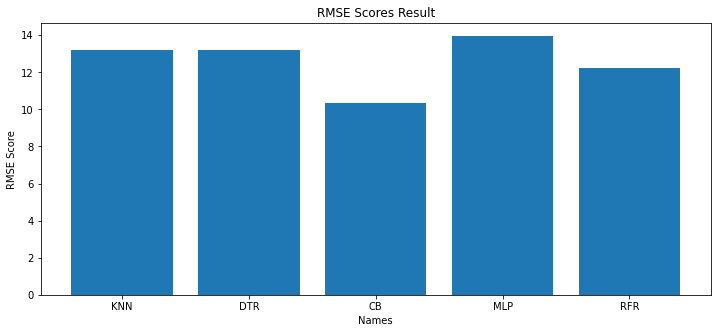

In [24]:
plt.figure(figsize=(12,5))
names = list(rmse.keys())
values = list(rmse.values())

plt.bar(range(len(rmse)), names, tick_label=values)
plt.title("RMSE Scores Result")
plt.xlabel("Names")
plt.ylabel("RMSE Score")
plt.show()

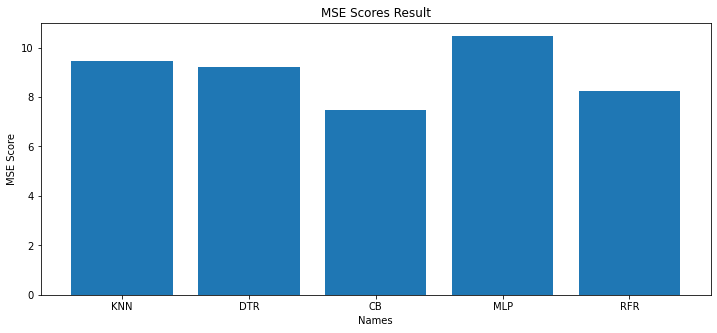

In [25]:
plt.figure(figsize=(12,5))
names = list(mse.keys())
values = list(mse.values())

plt.bar(range(len(mse)), names, tick_label=values)
plt.title("MSE Scores Result")
plt.xlabel("Names")
plt.ylabel("MSE Score")
plt.show()

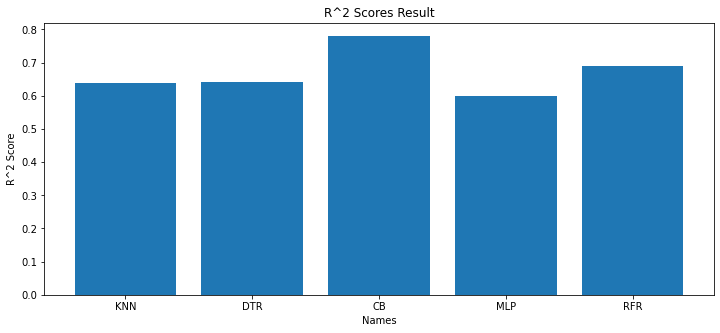

In [26]:
plt.figure(figsize=(12,5))
names = list(r2.keys())
values = list(r2.values())

plt.bar(range(len(r2)), names, tick_label=values)
plt.title("R^2 Scores Result")
plt.xlabel("Names")
plt.ylabel("R^2 Score")
plt.show()